## Pellet and Meal Analysis and Distribution

In [51]:
import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean, read_excel_by_sheet

### Average Meal Per Hour in flip experiment

In [23]:
flip_ctrl_meal_count = []
for path in paths.contigency_flip_ctrl:
    test = read_csv_clean(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    flip_ctrl_meal_count.append(avg)
flip_ctrl_meal_count

[18.47, 20.14, 20.68, 21.2, 18.23, 25.04]

In [24]:
flip_cask_meal_count = []
for path in paths.contigency_flip_cask:
    test = read_csv_clean(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    flip_cask_meal_count.append(avg)
flip_cask_meal_count

[37.67,
 29.17,
 39.21,
 27.3,
 37.06,
 21.82,
 23.29,
 18.65,
 31.19,
 37.4,
 30.56,
 23.74,
 24.75,
 24.38]

### Control Group

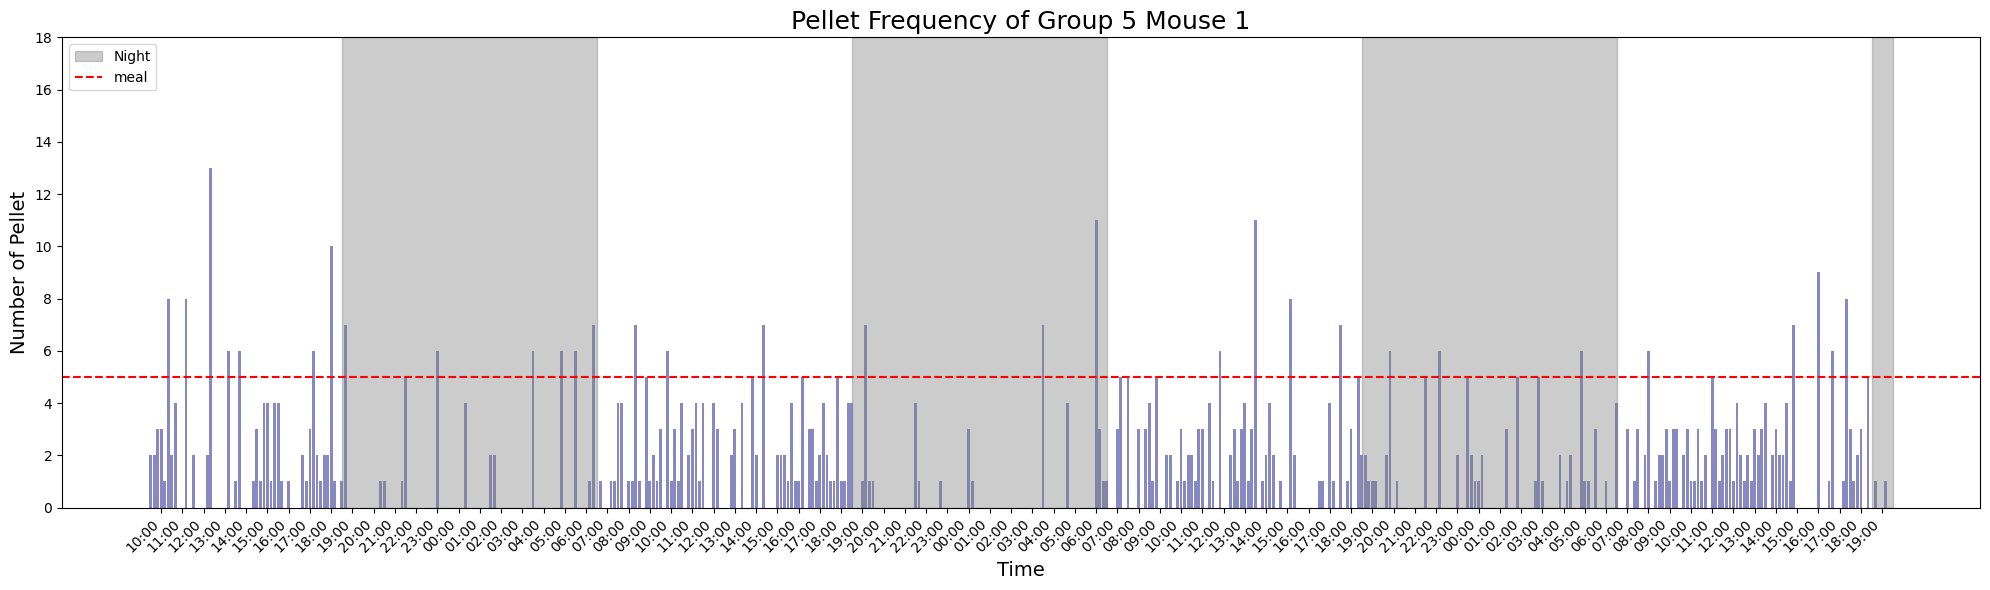

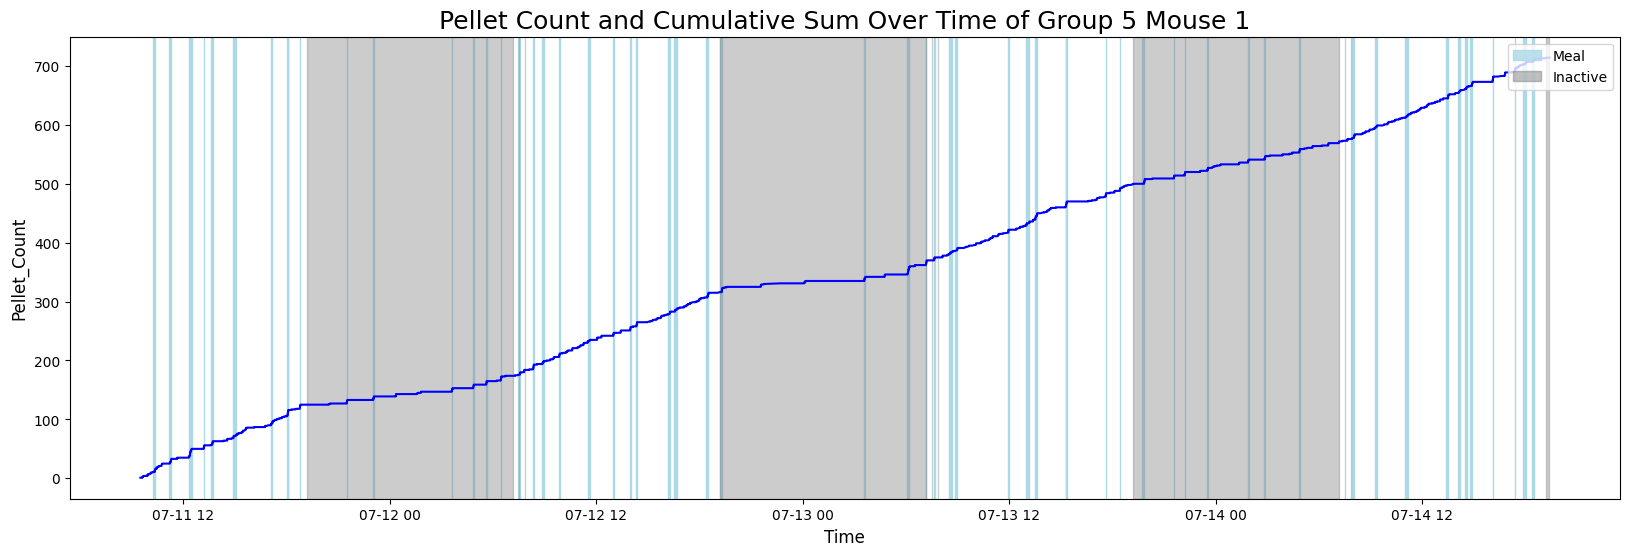

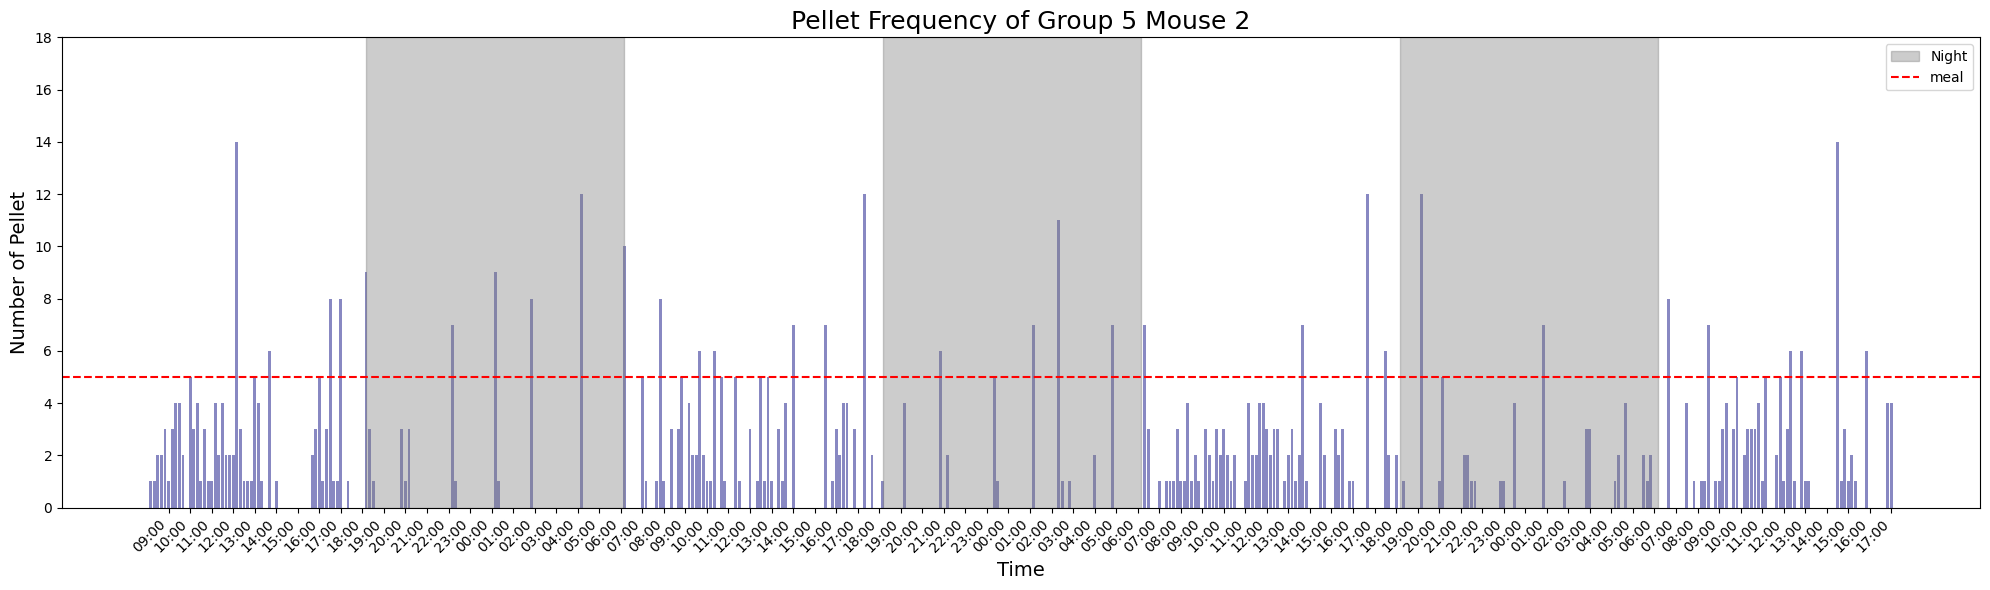

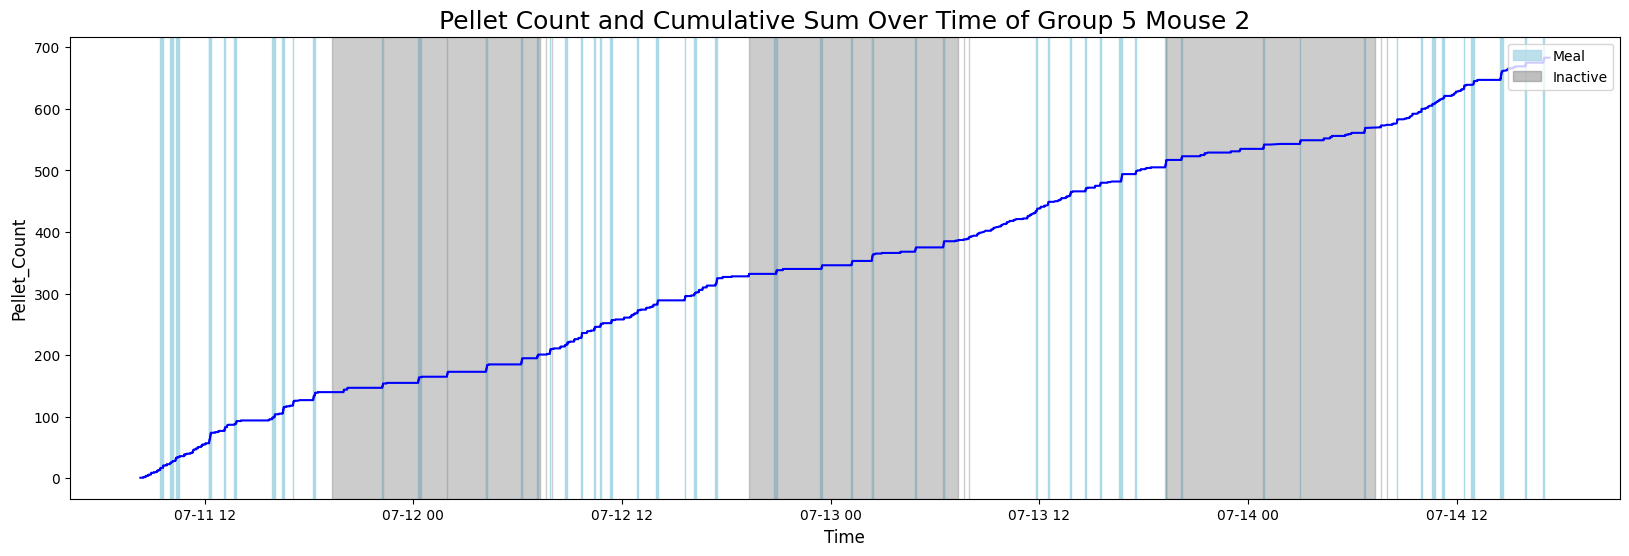

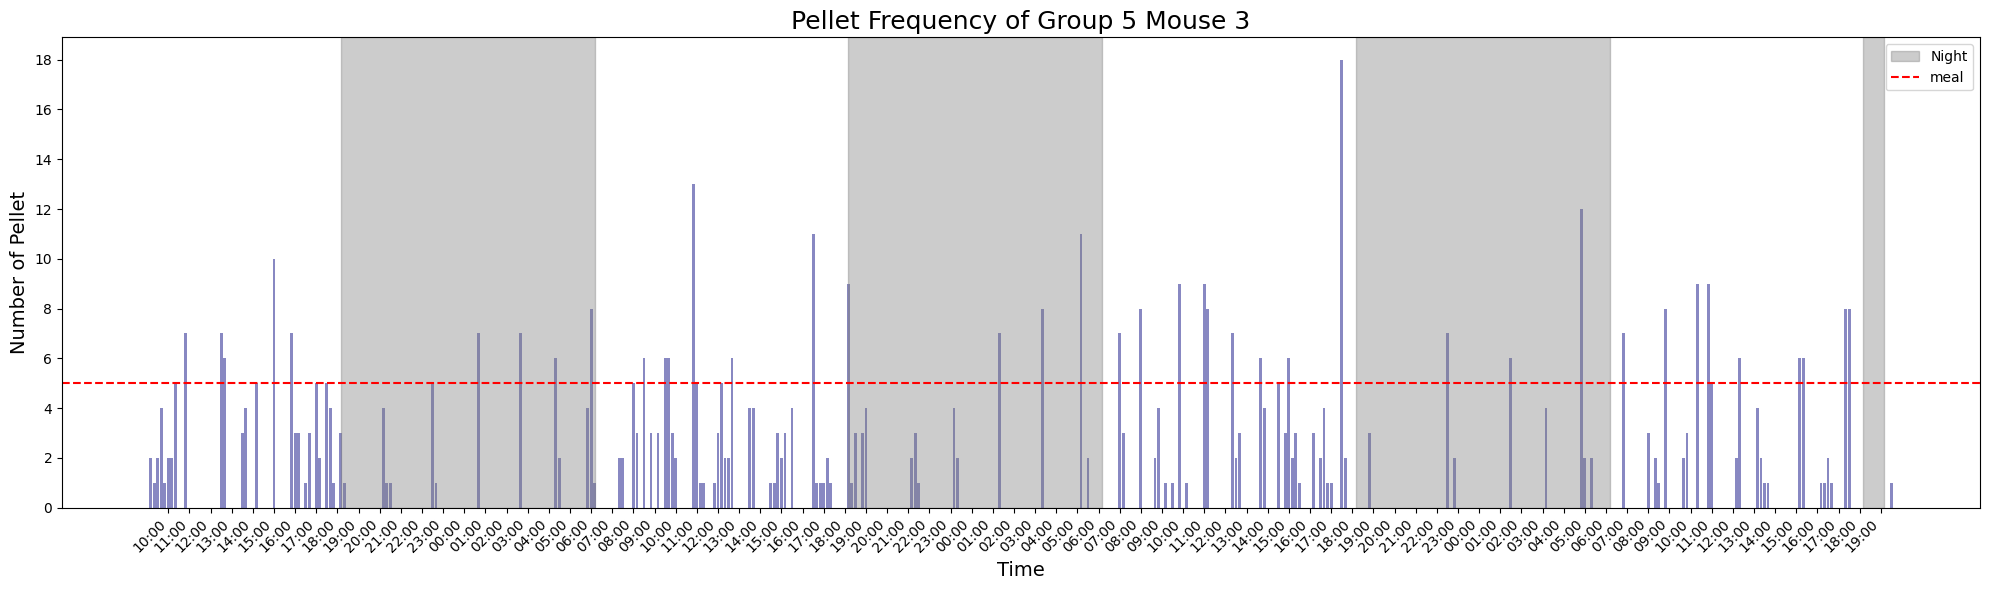

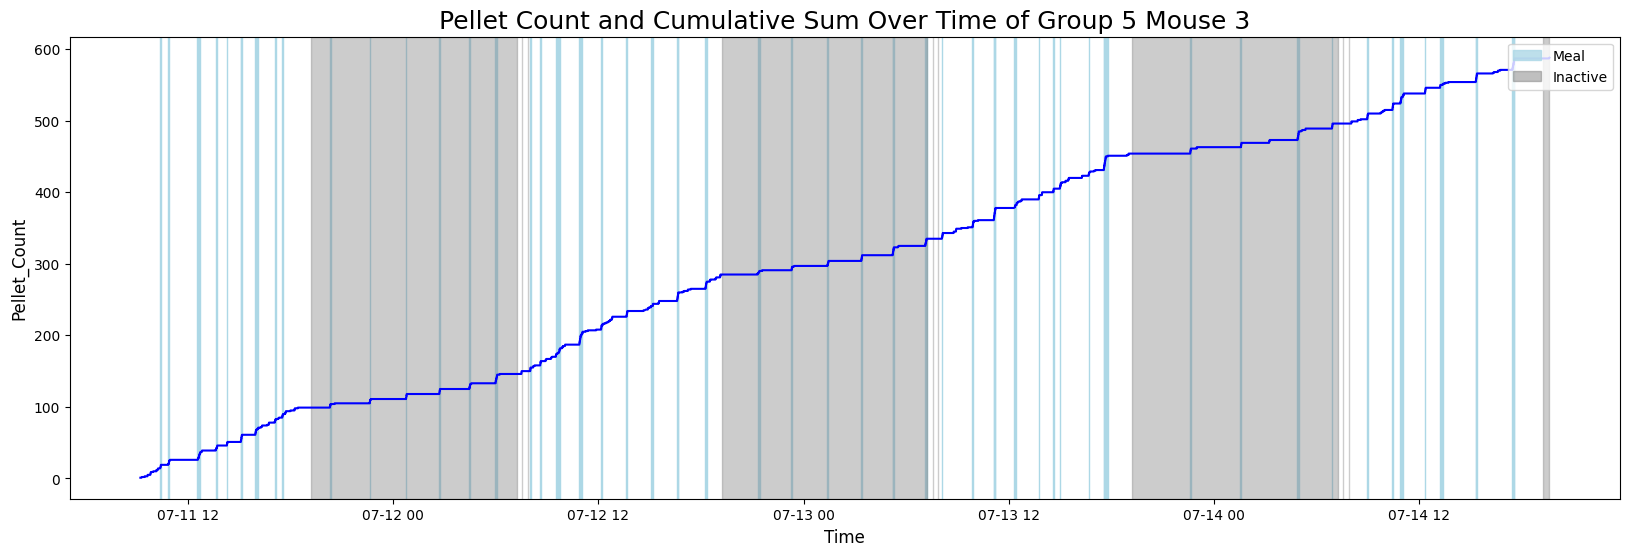

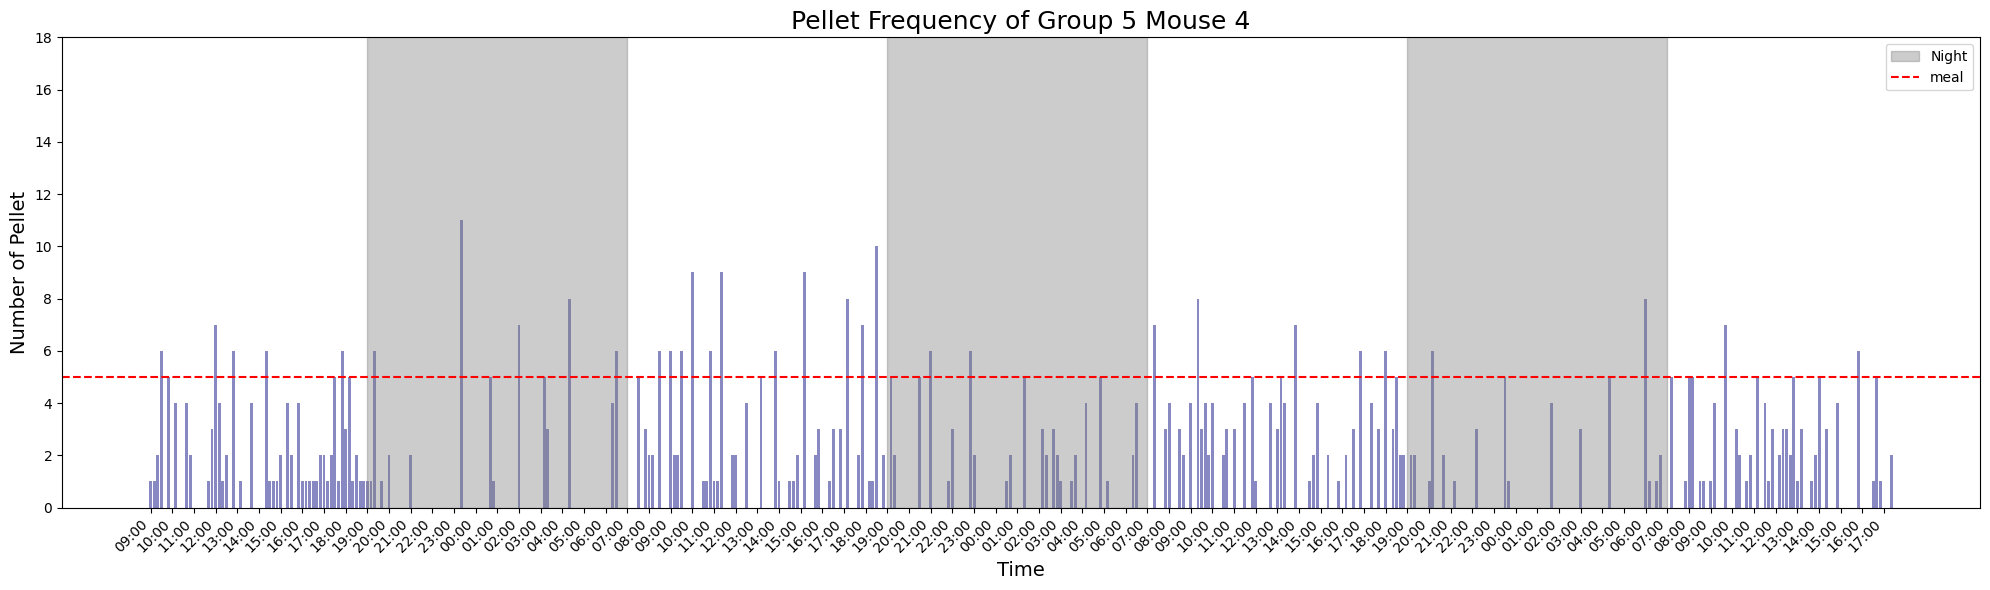

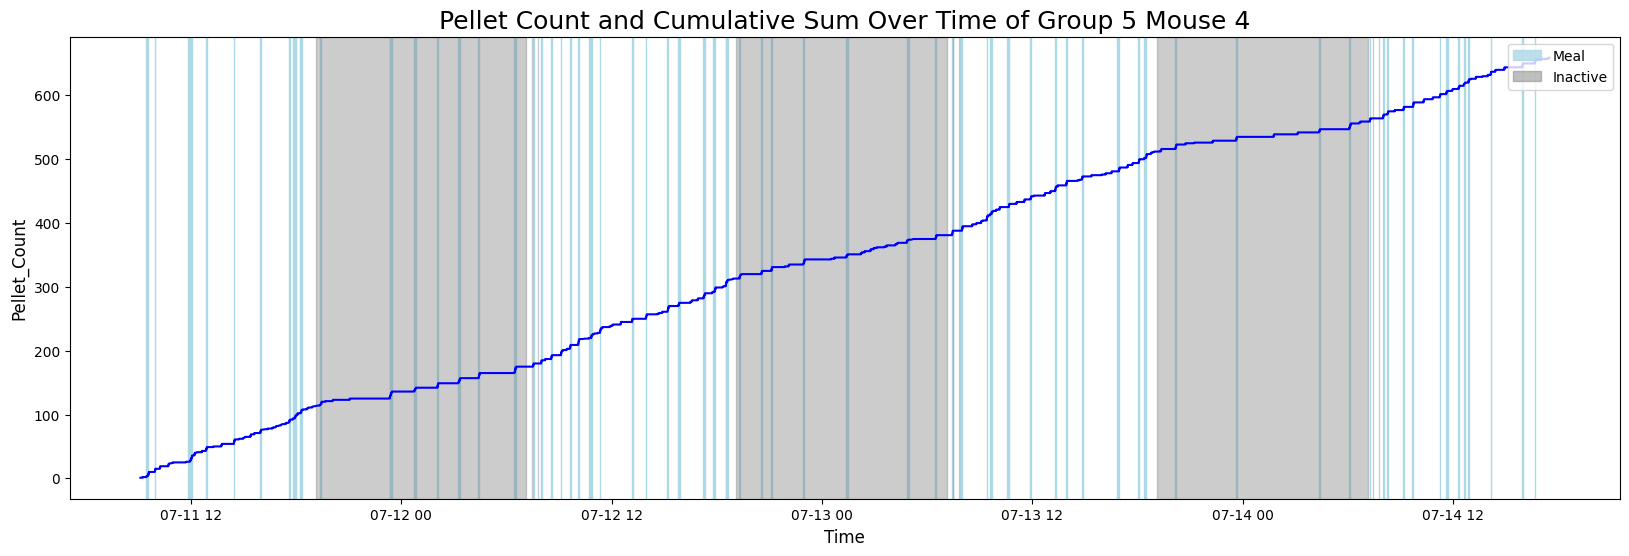

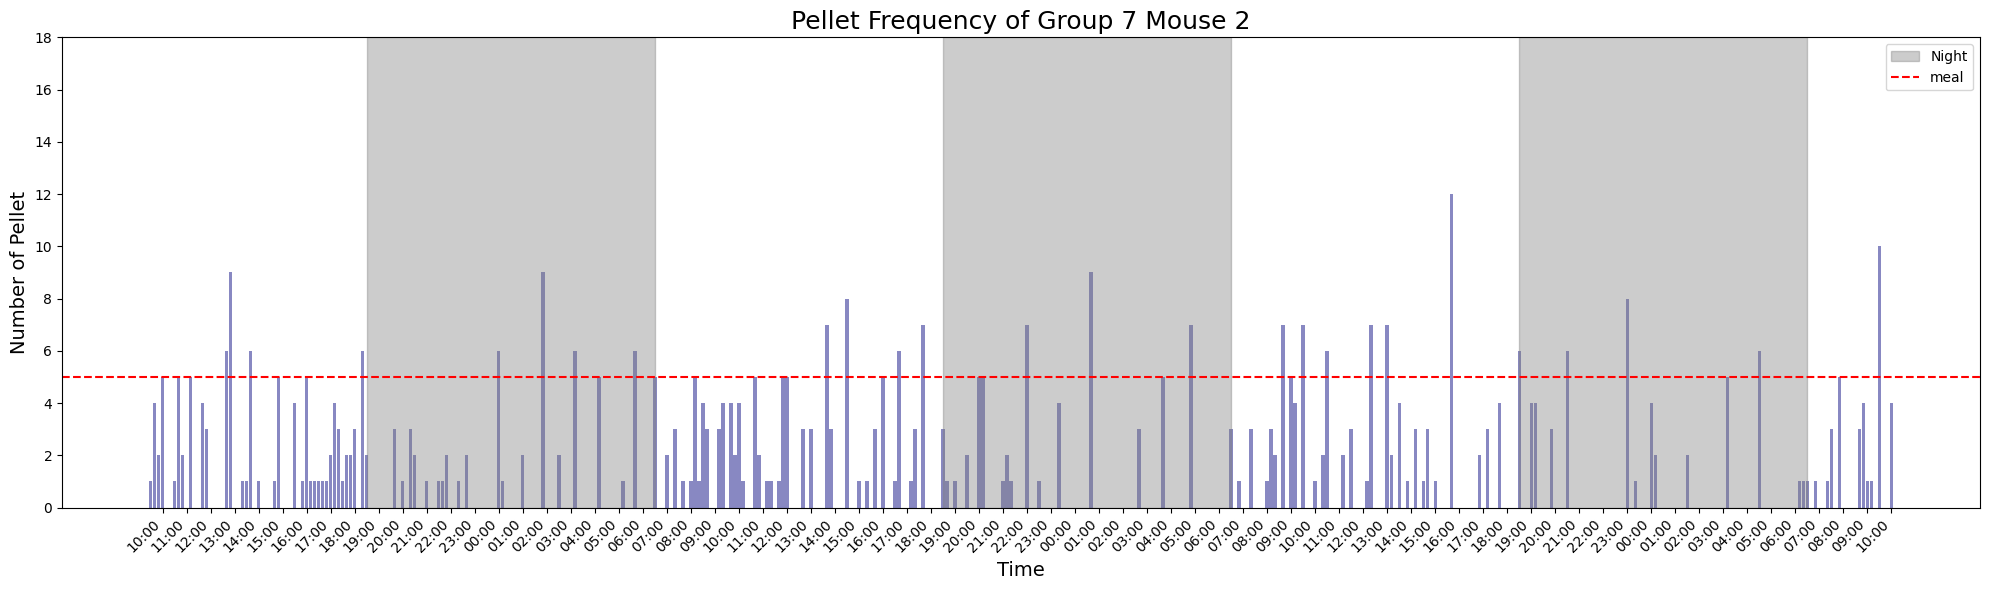

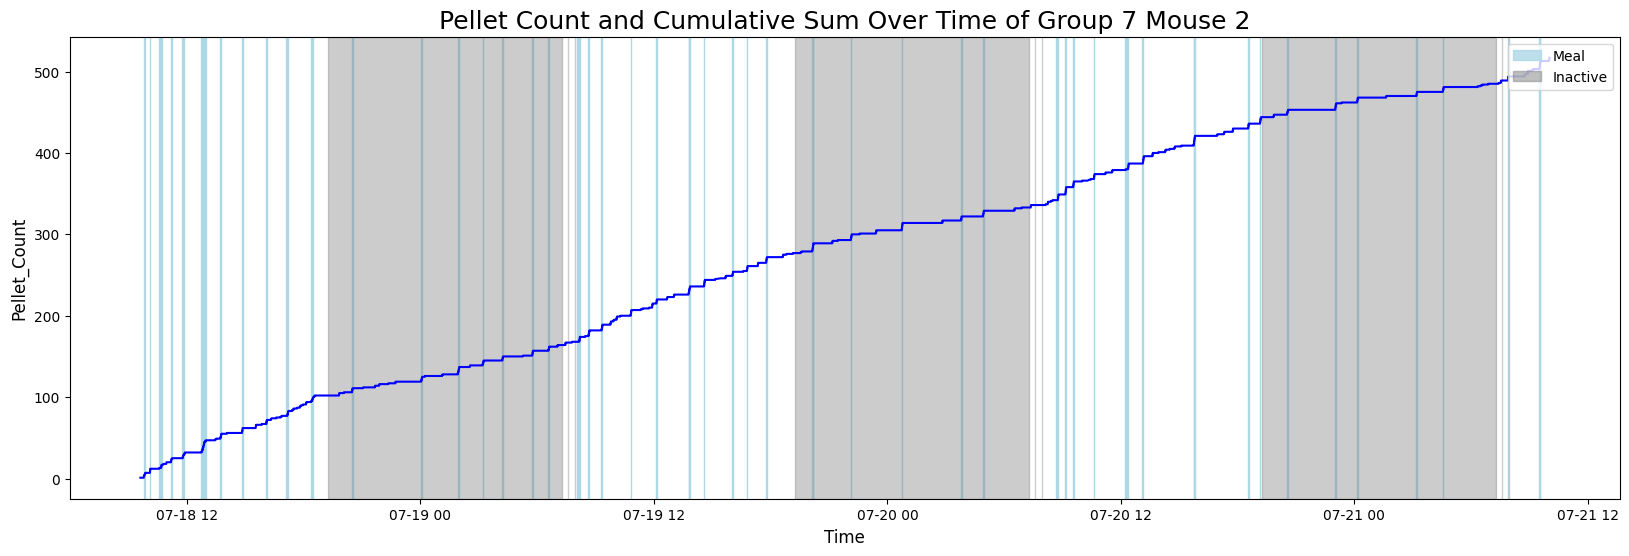

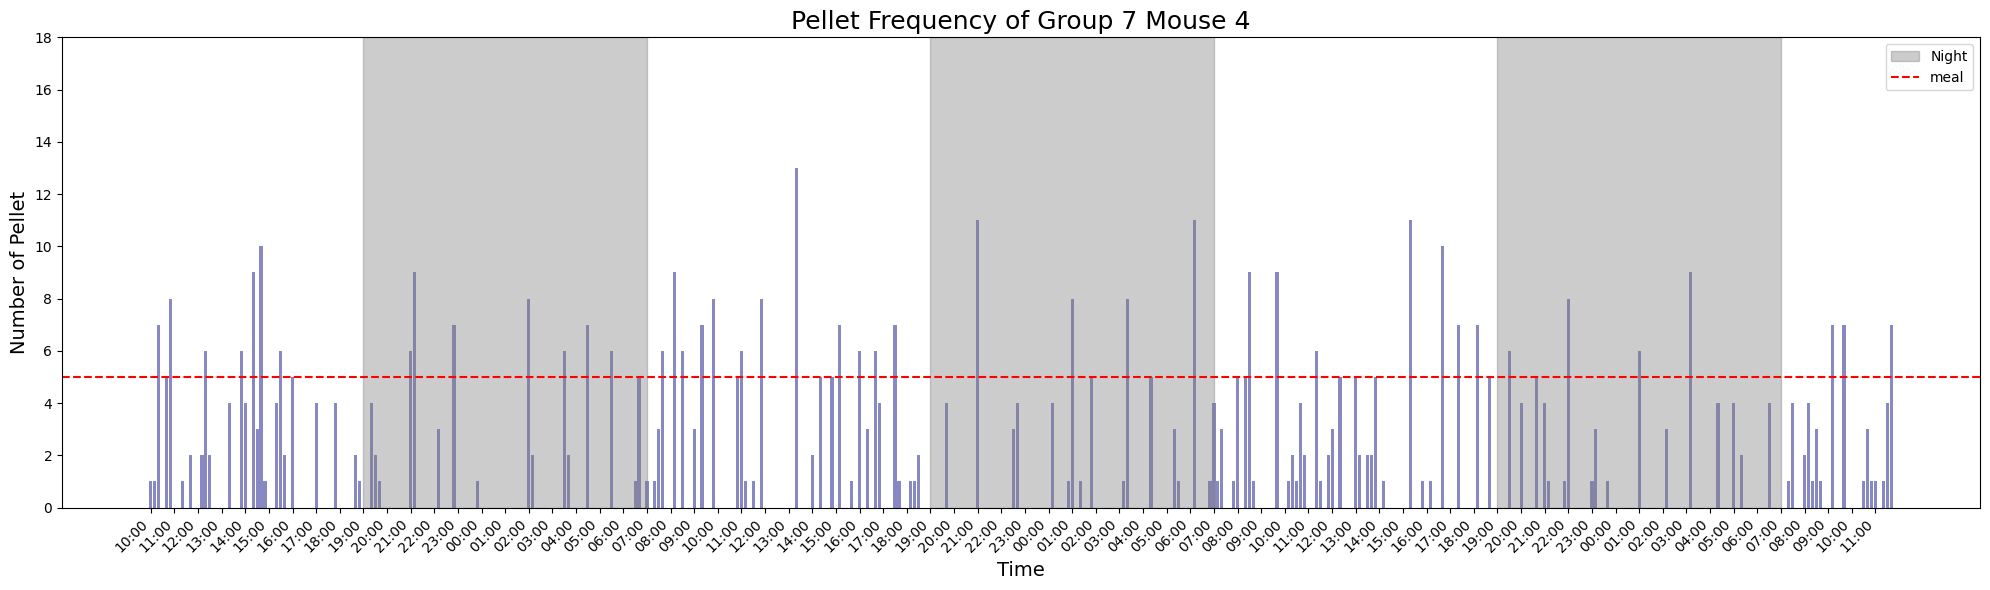

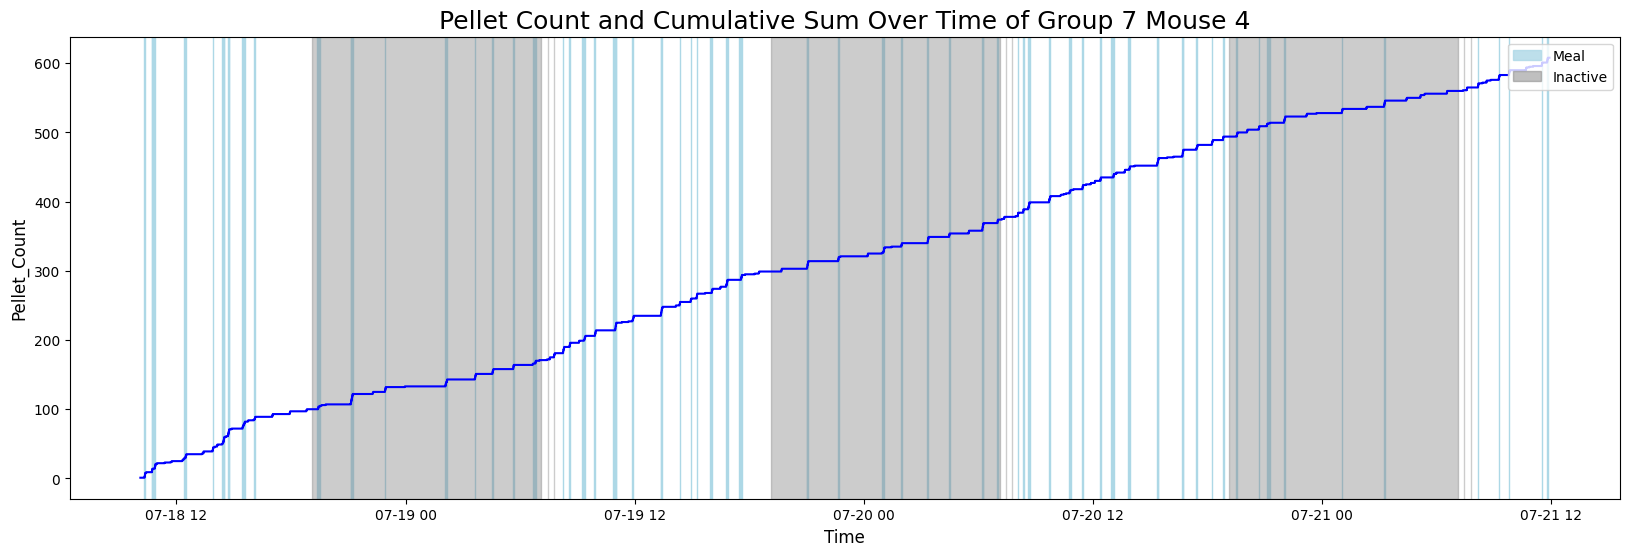

In [25]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
for path in paths.contigency_flip_ctrl:
    data = read_csv_clean(path)
    meal = ml.find_meals(data)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [26]:
ctrl_avg_pellet

[8.743, 8.449, 7.142, 8.203, 7.131, 8.253]

### Cask Group

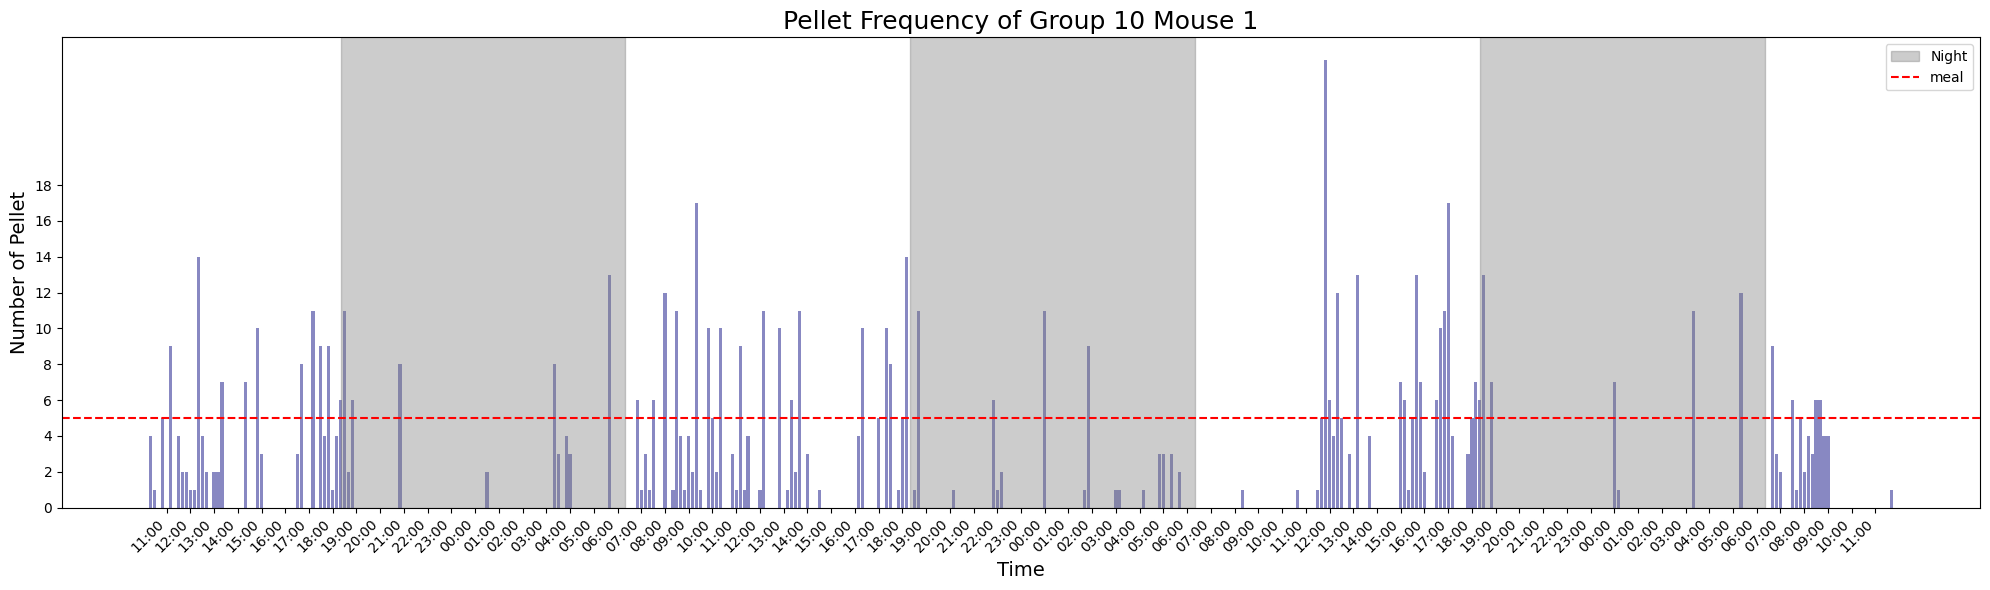

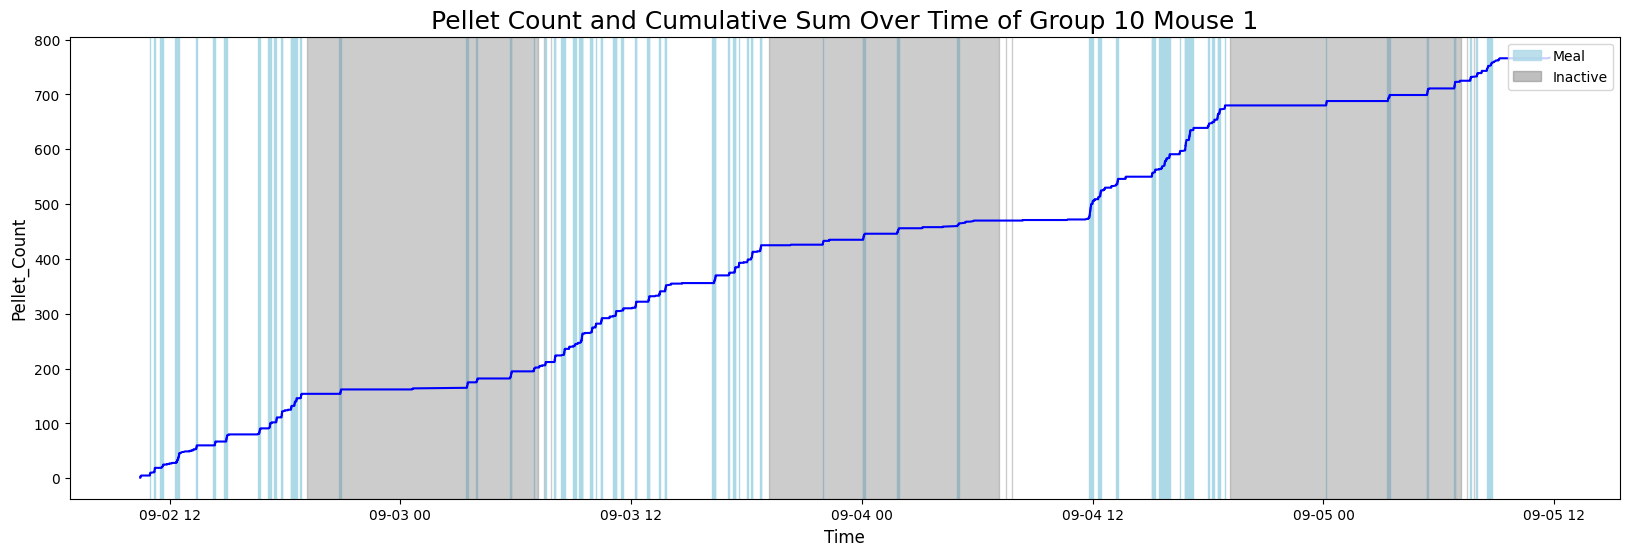

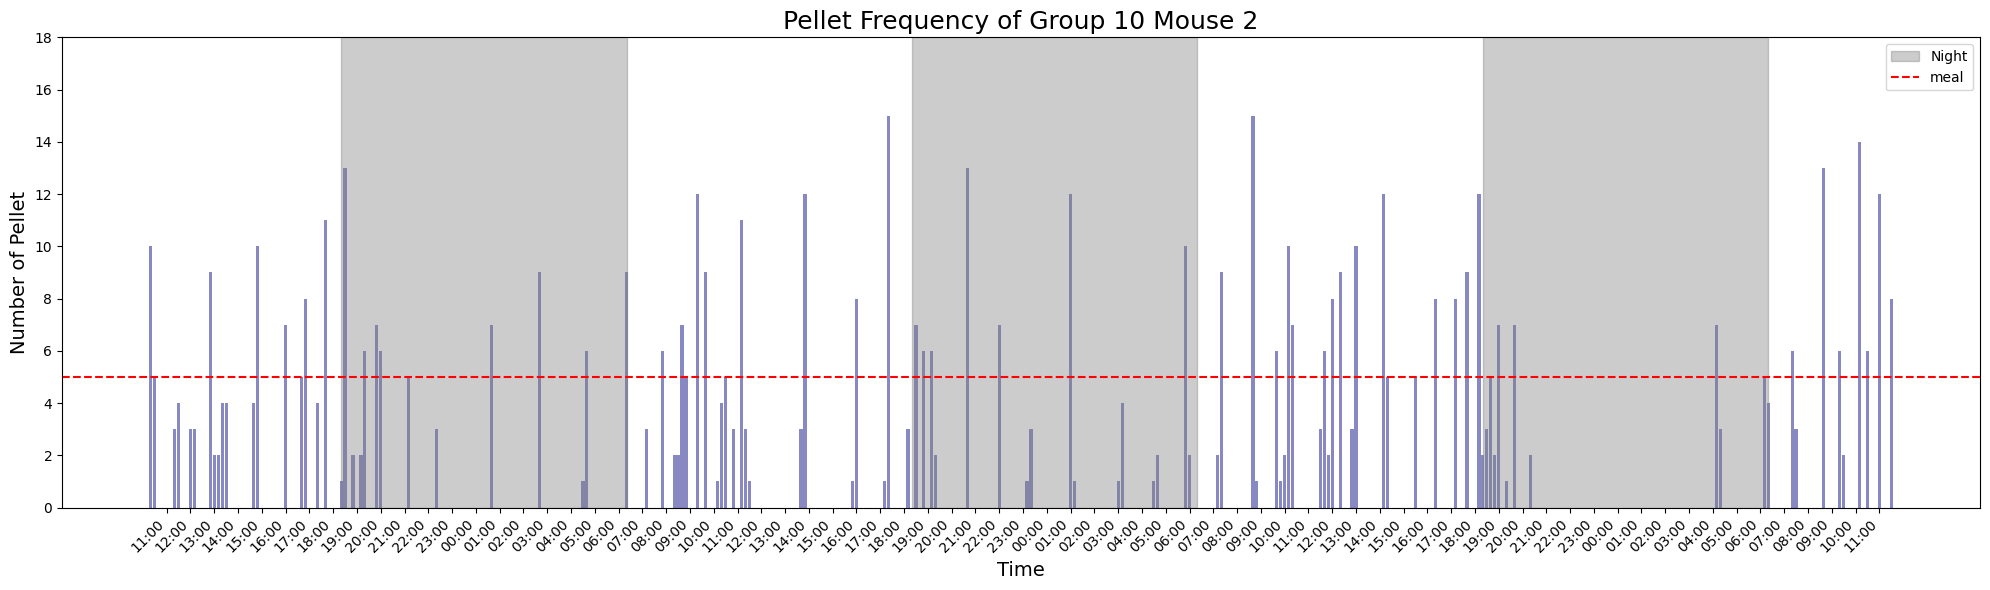

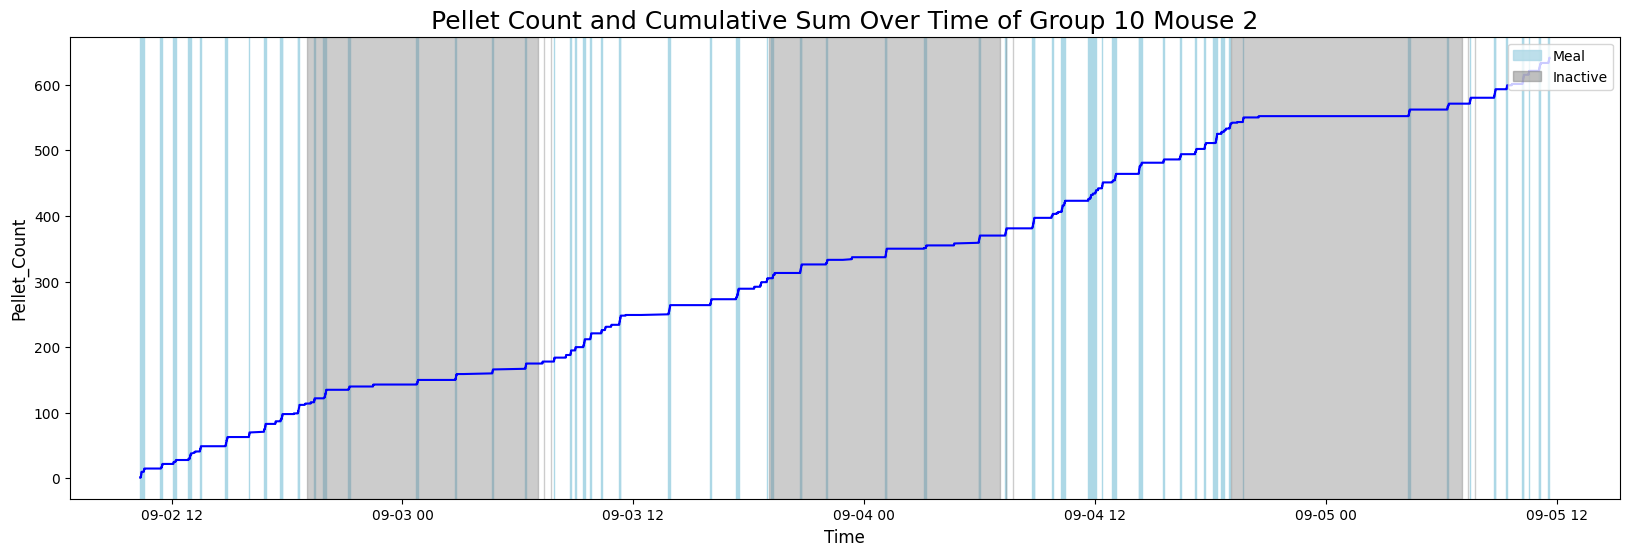

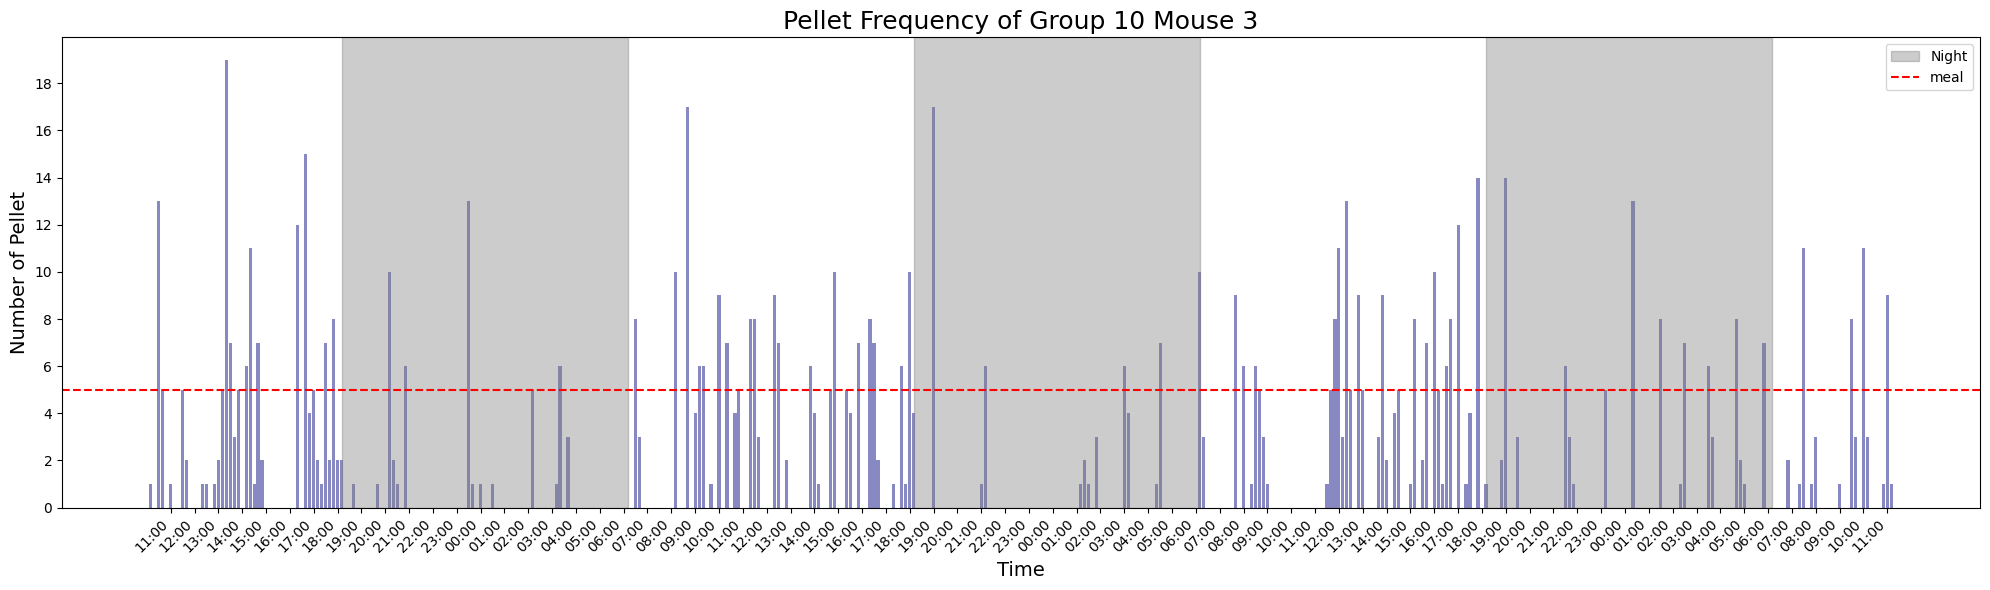

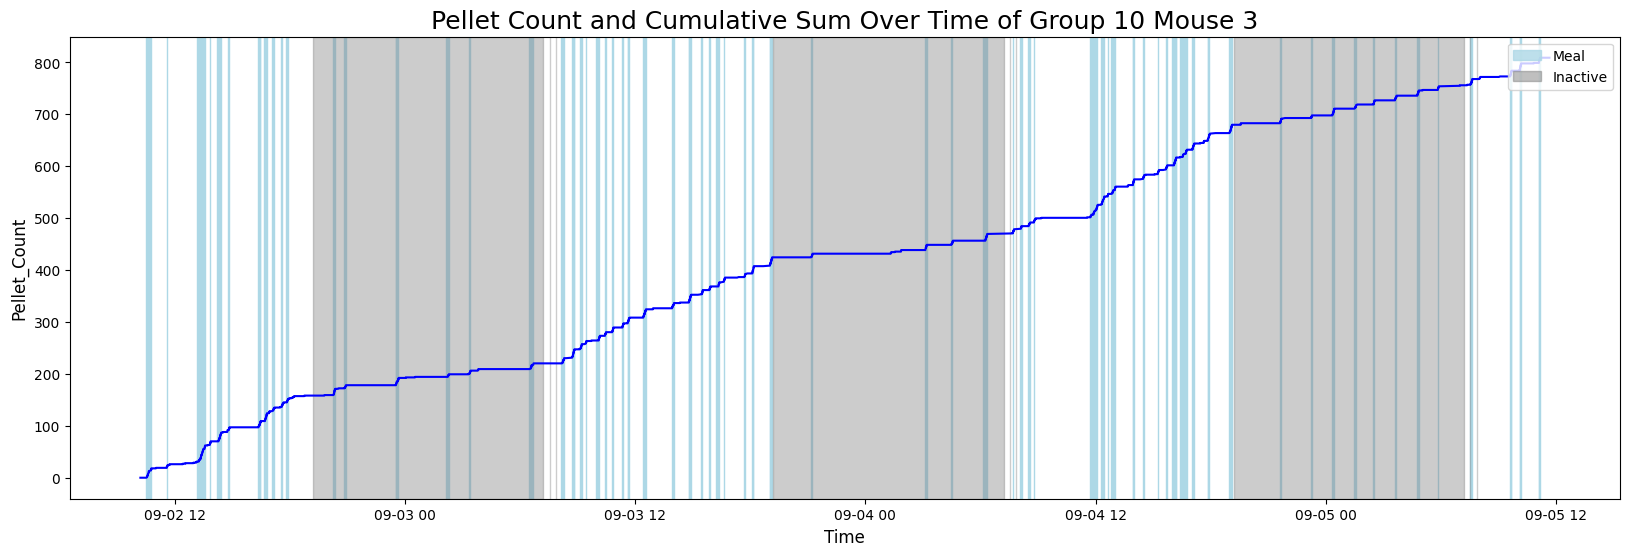

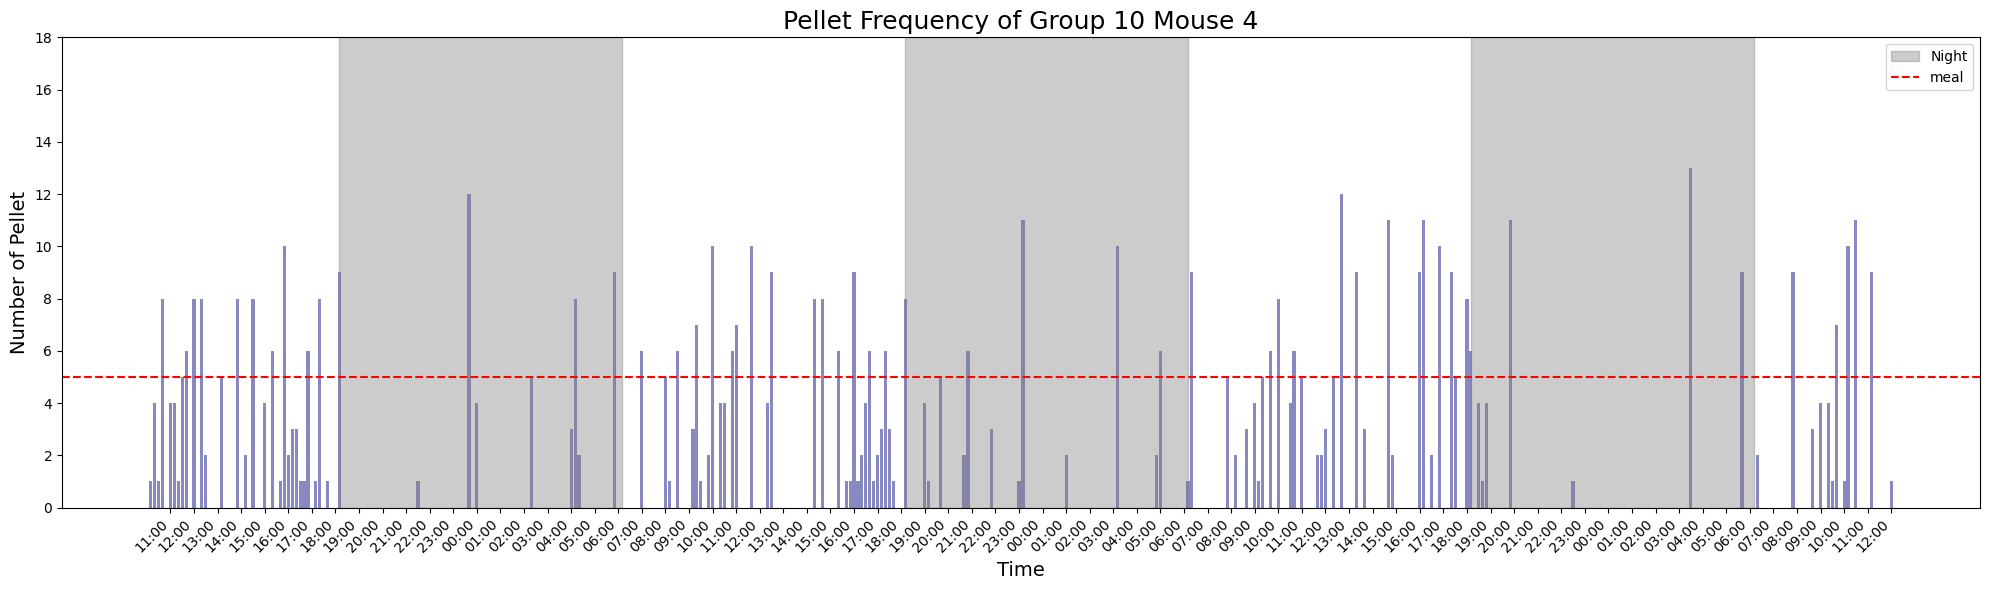

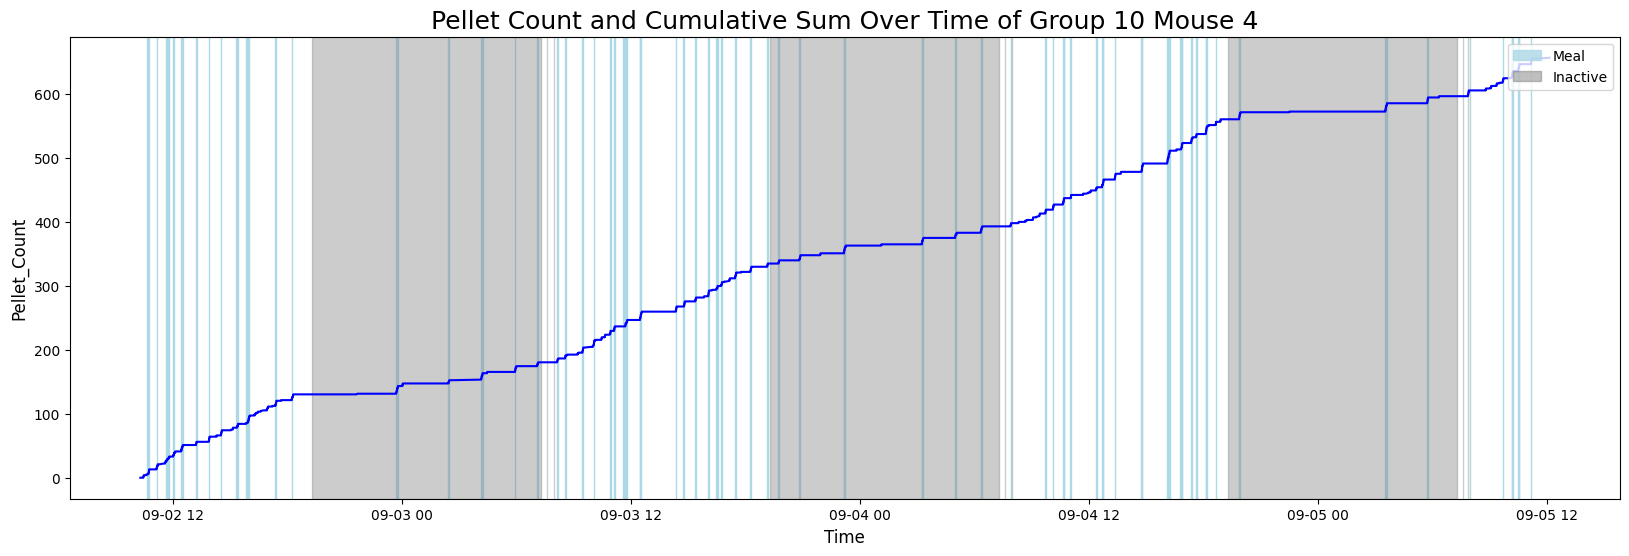

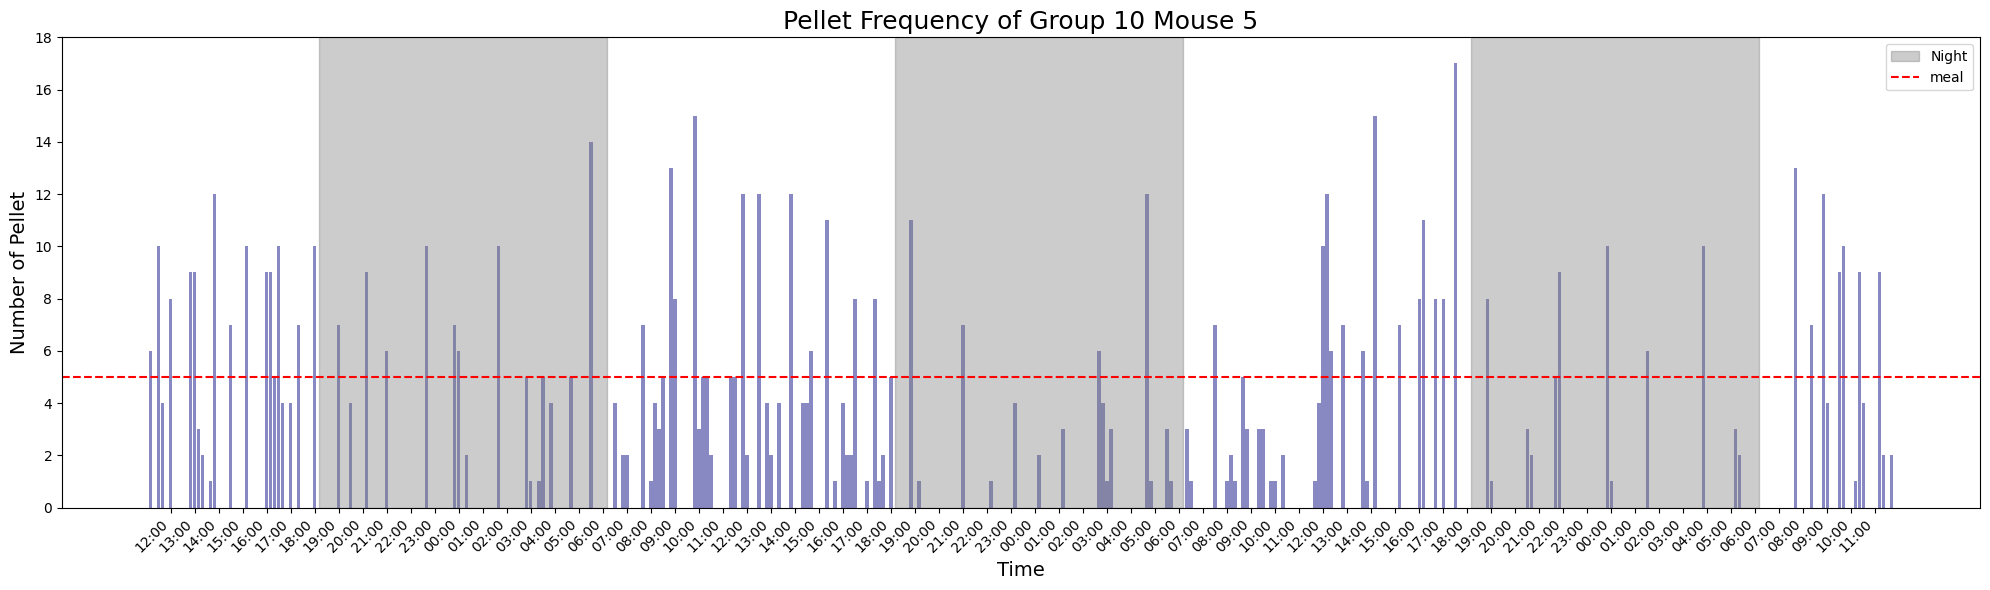

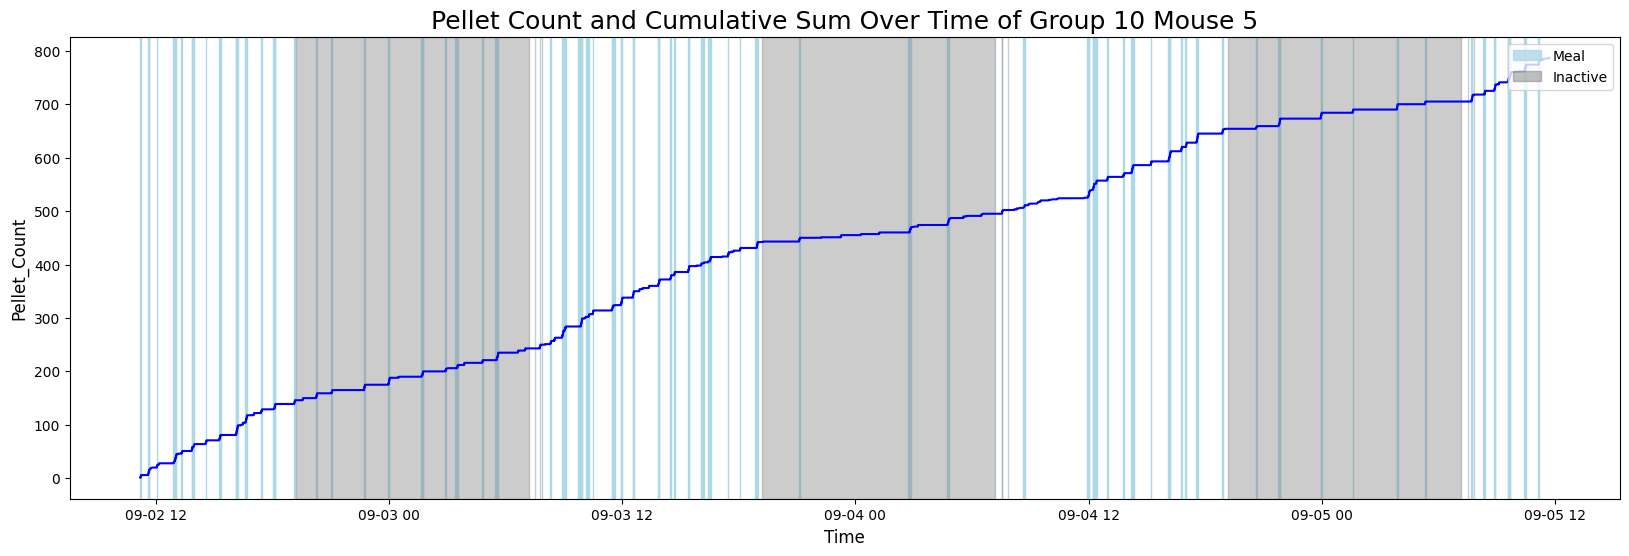

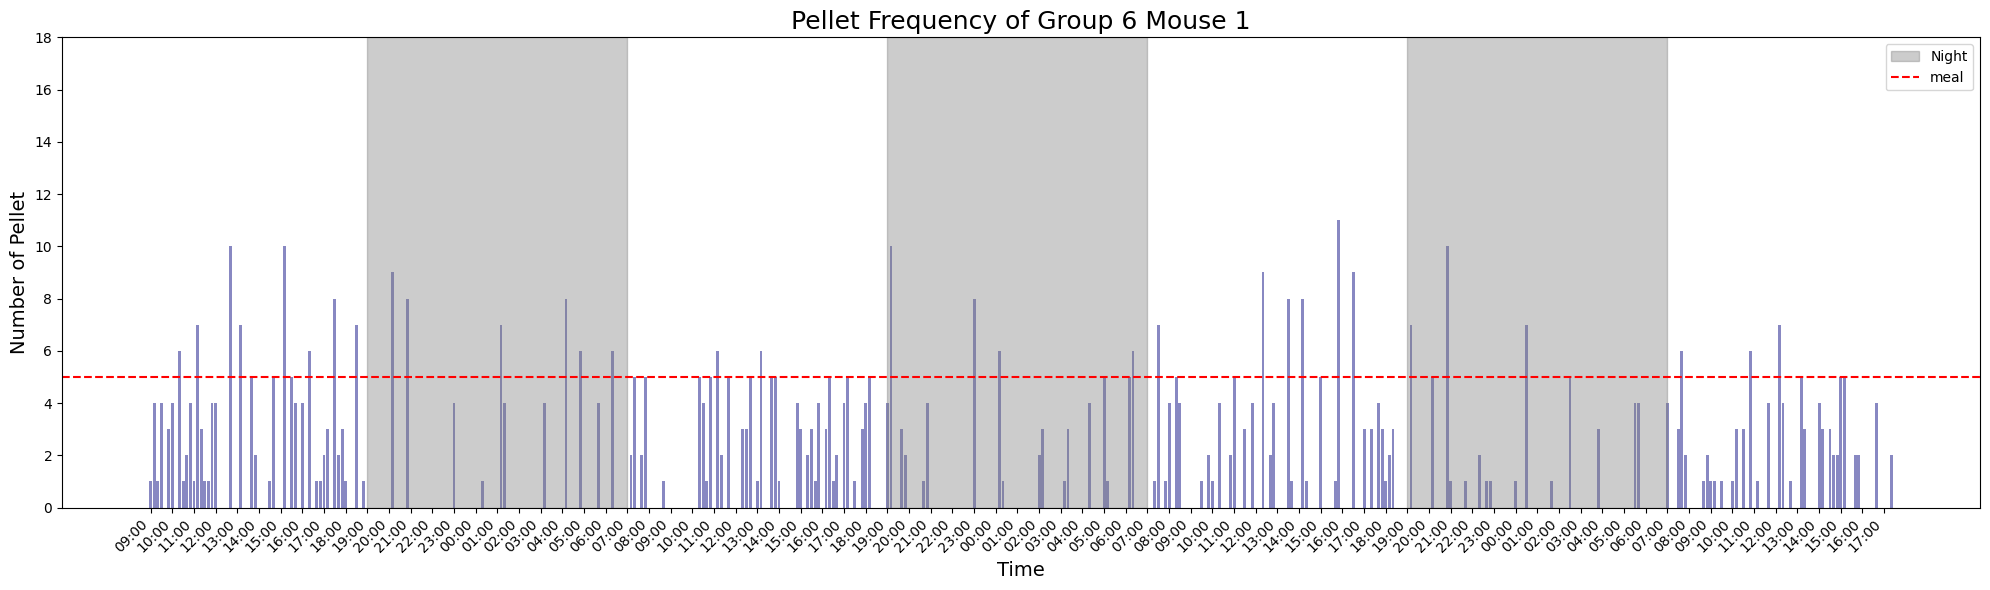

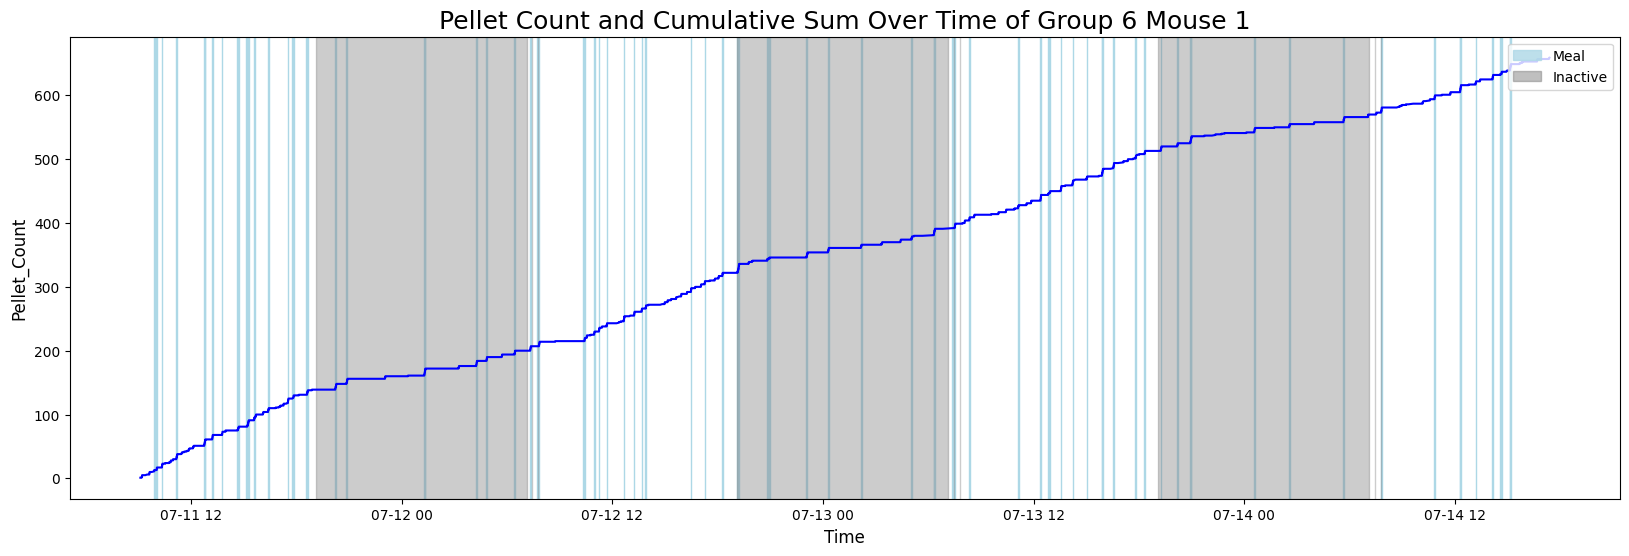

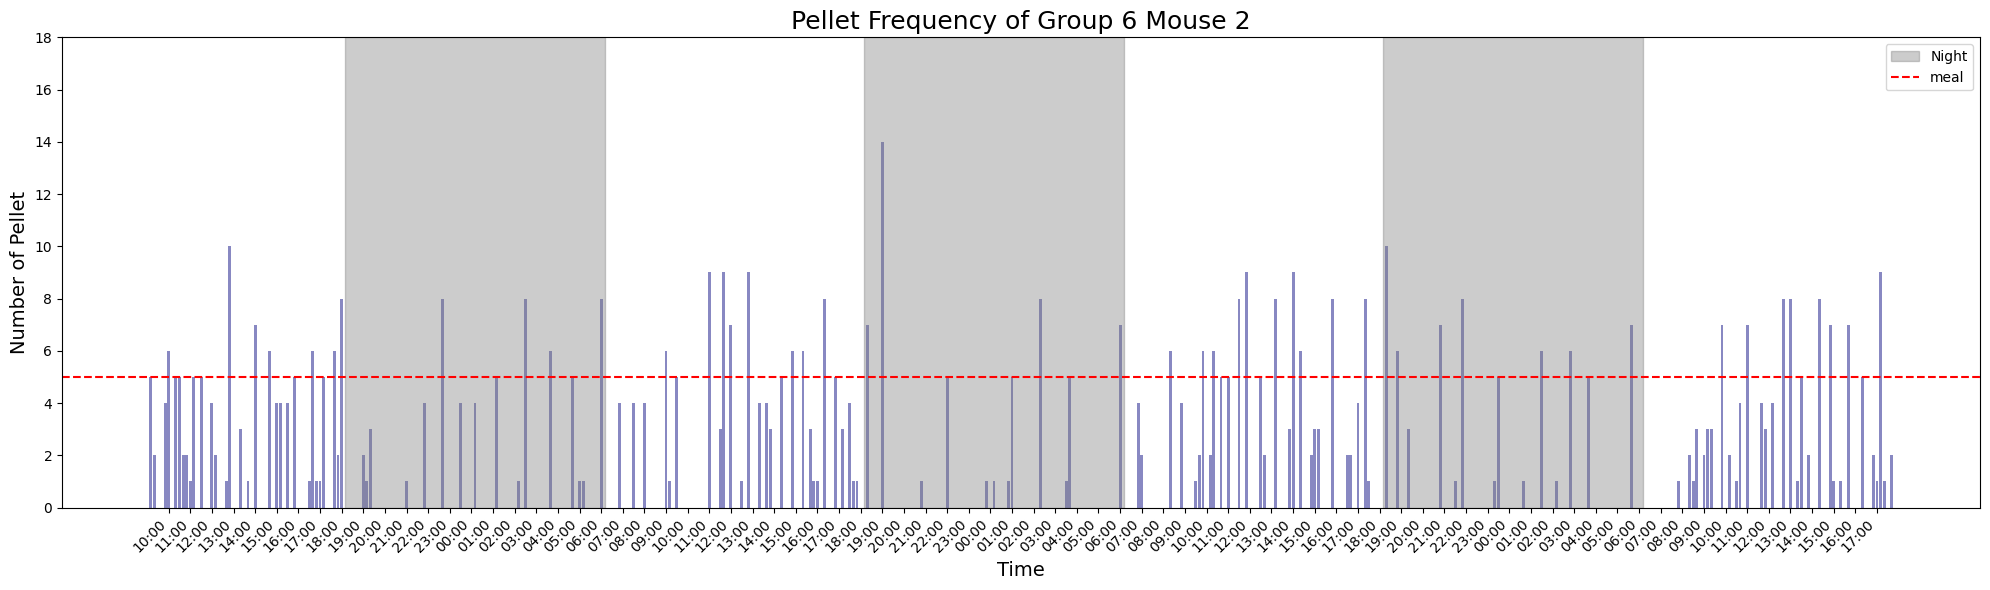

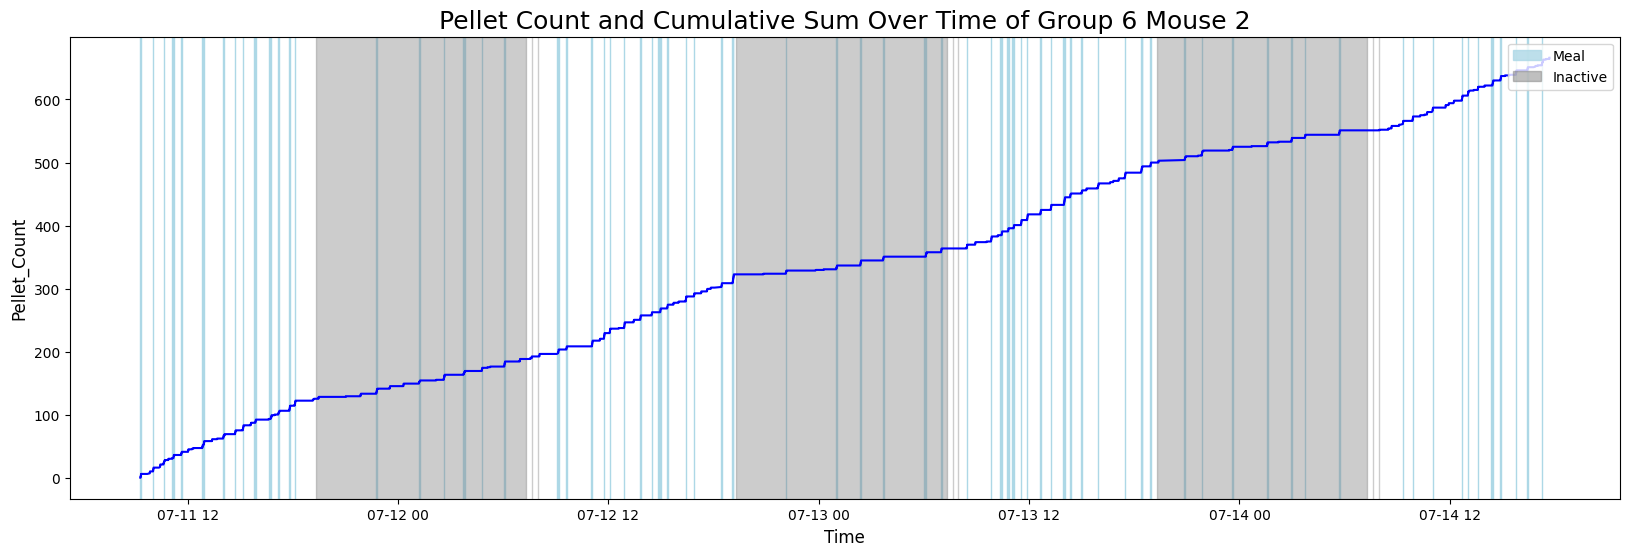

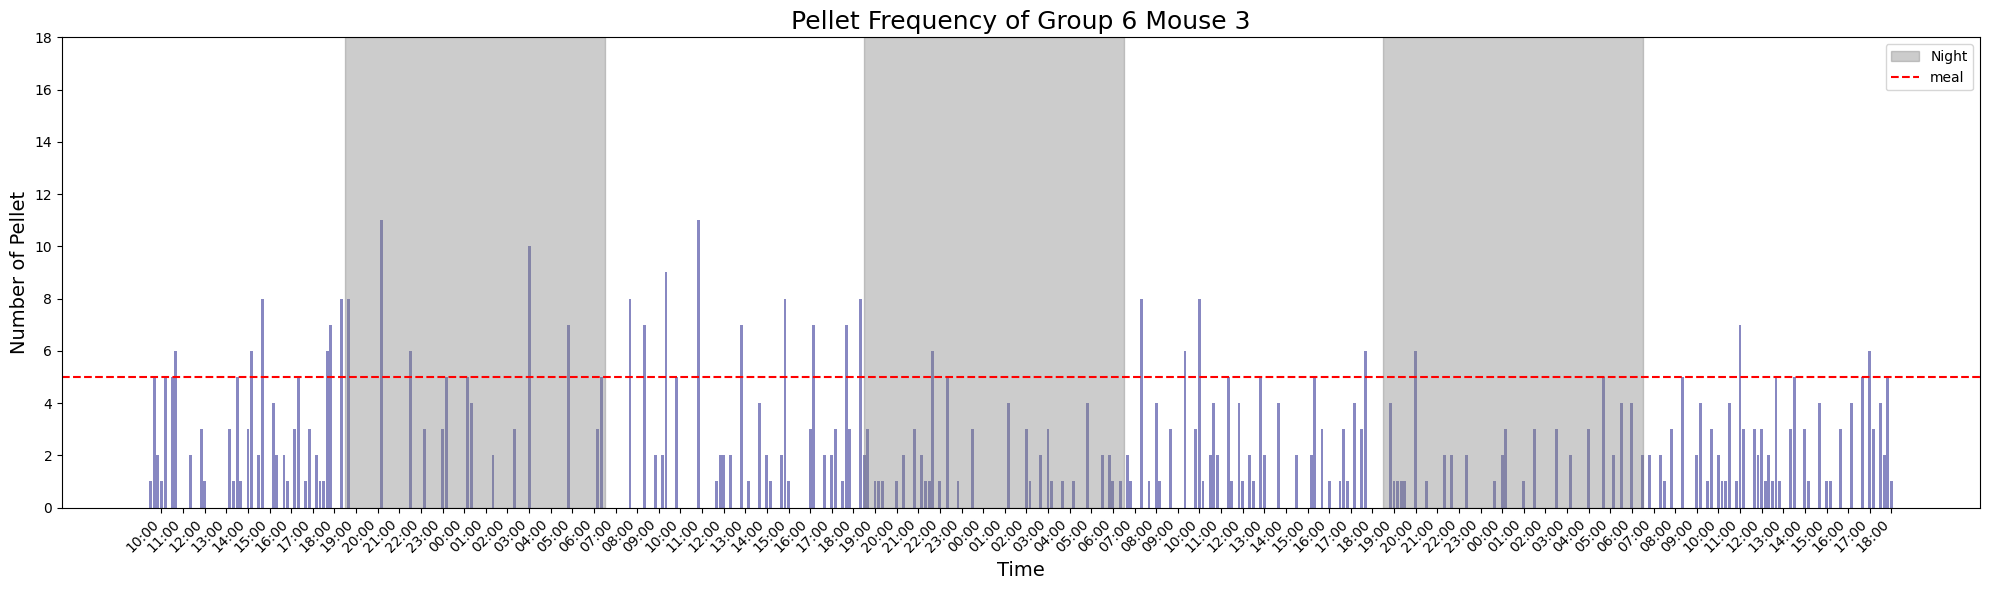

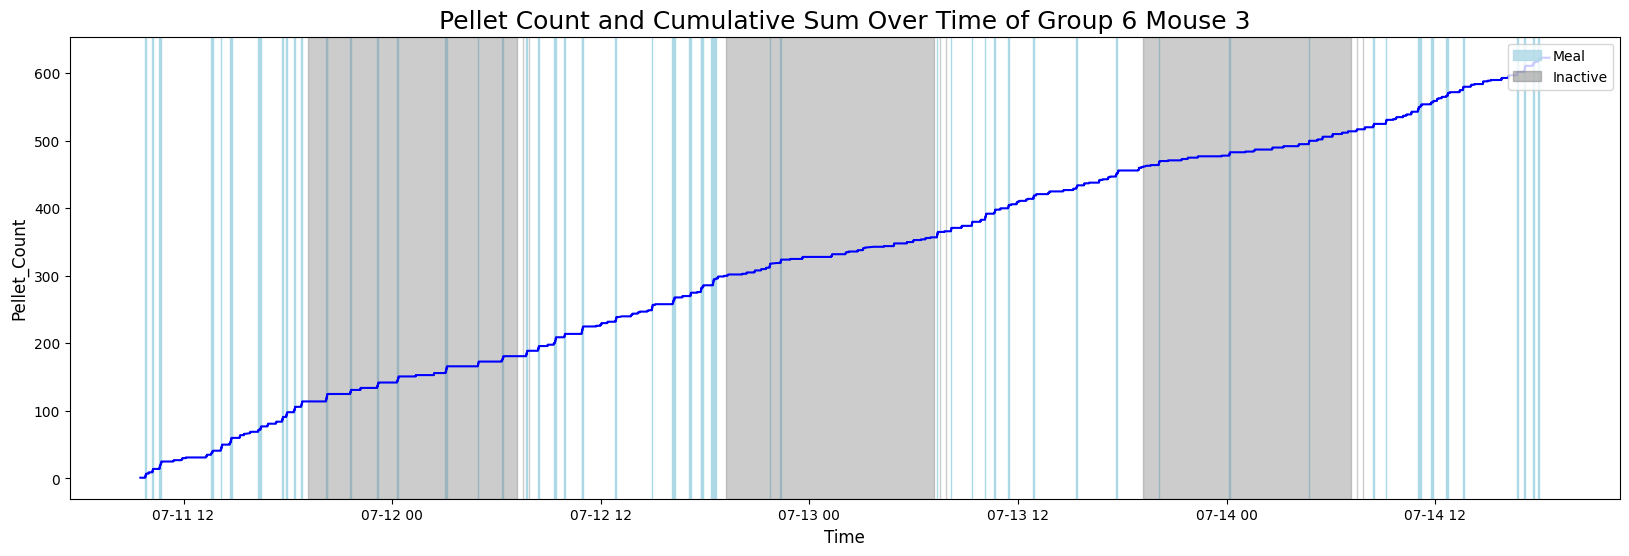

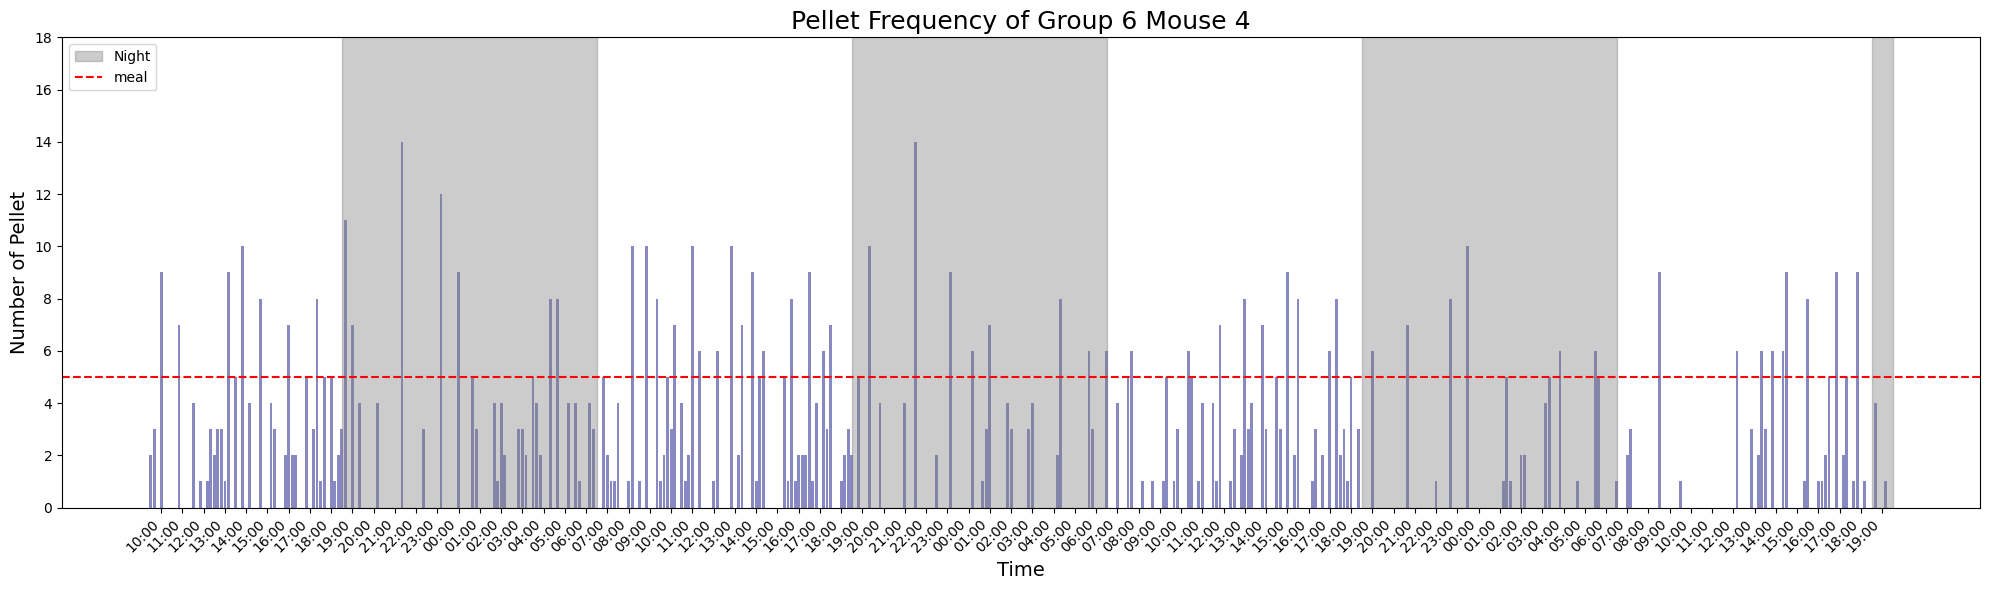

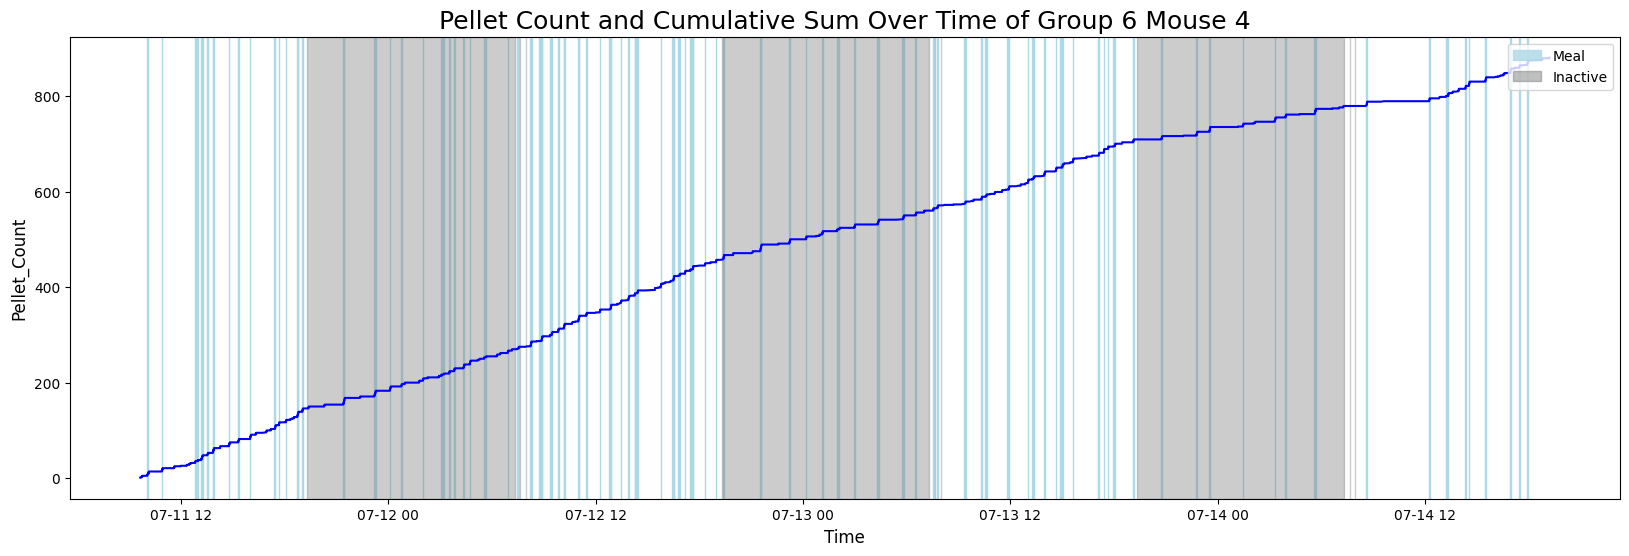

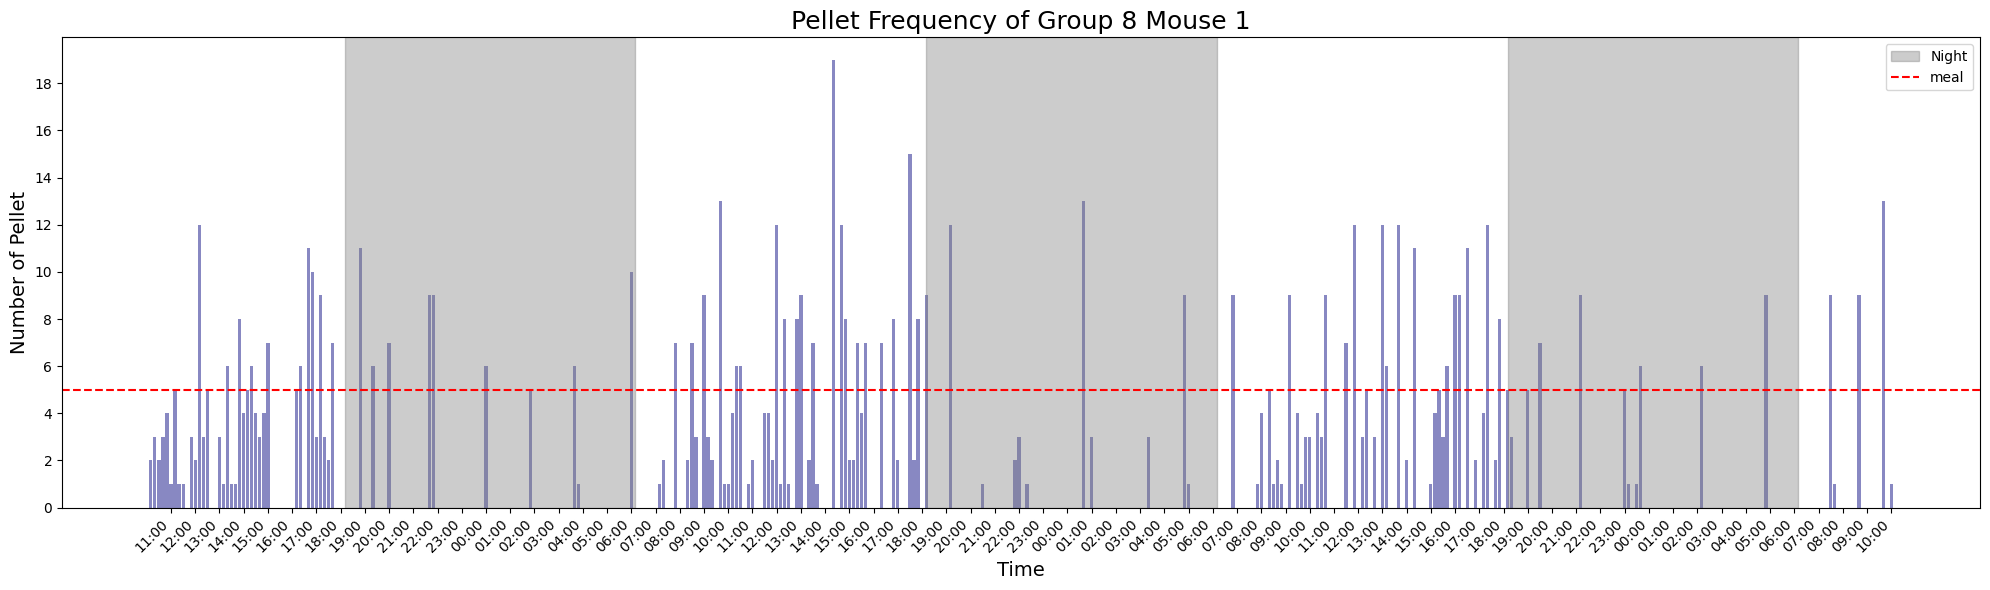

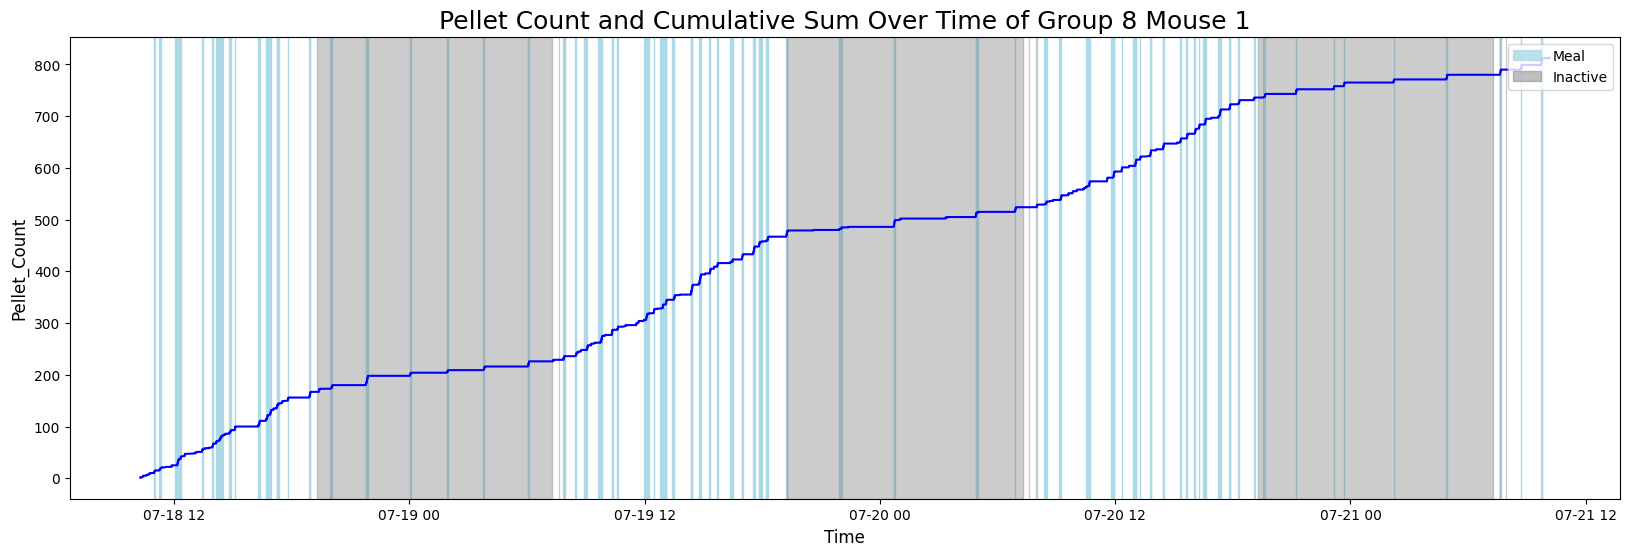

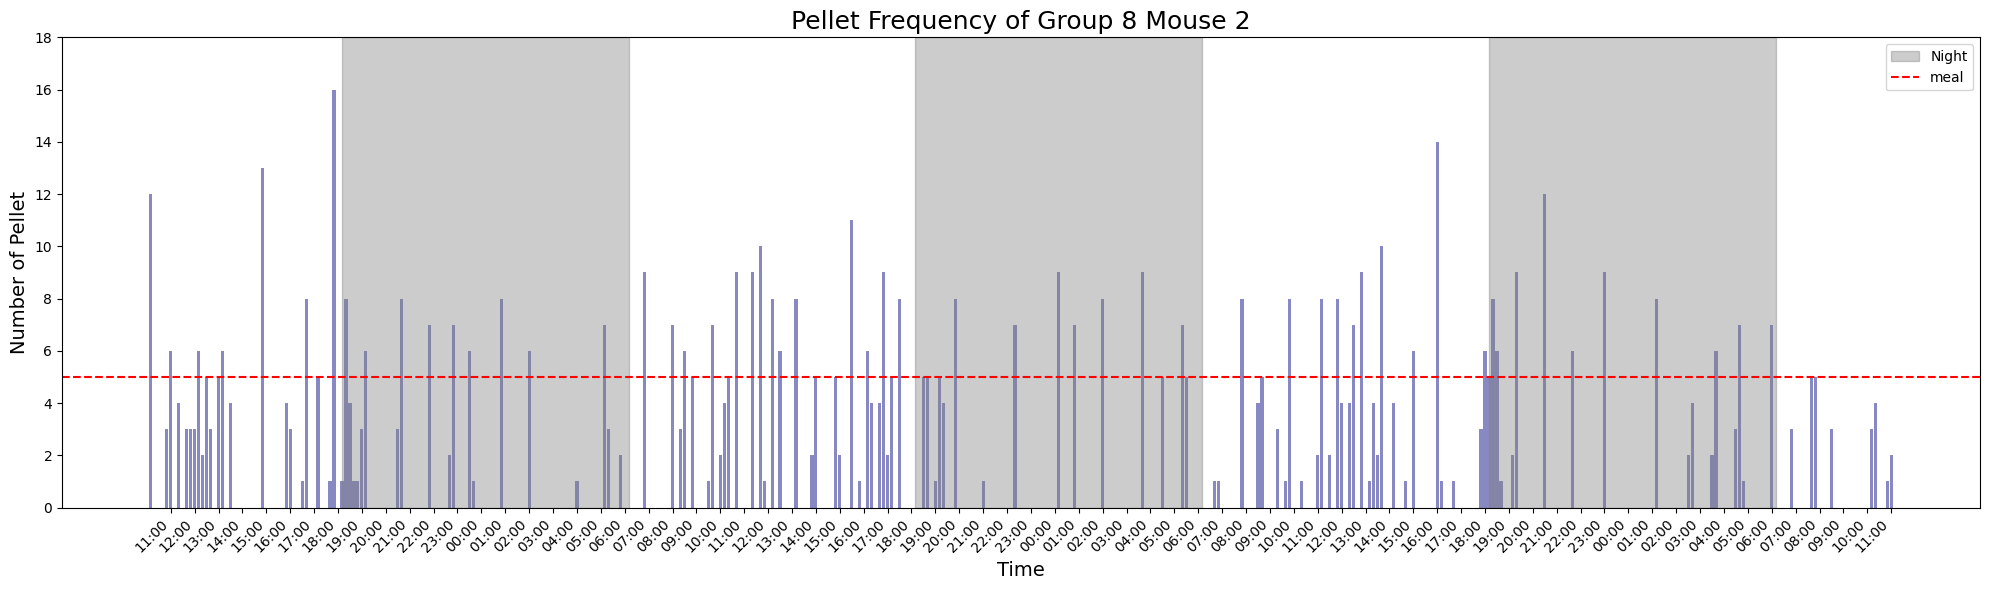

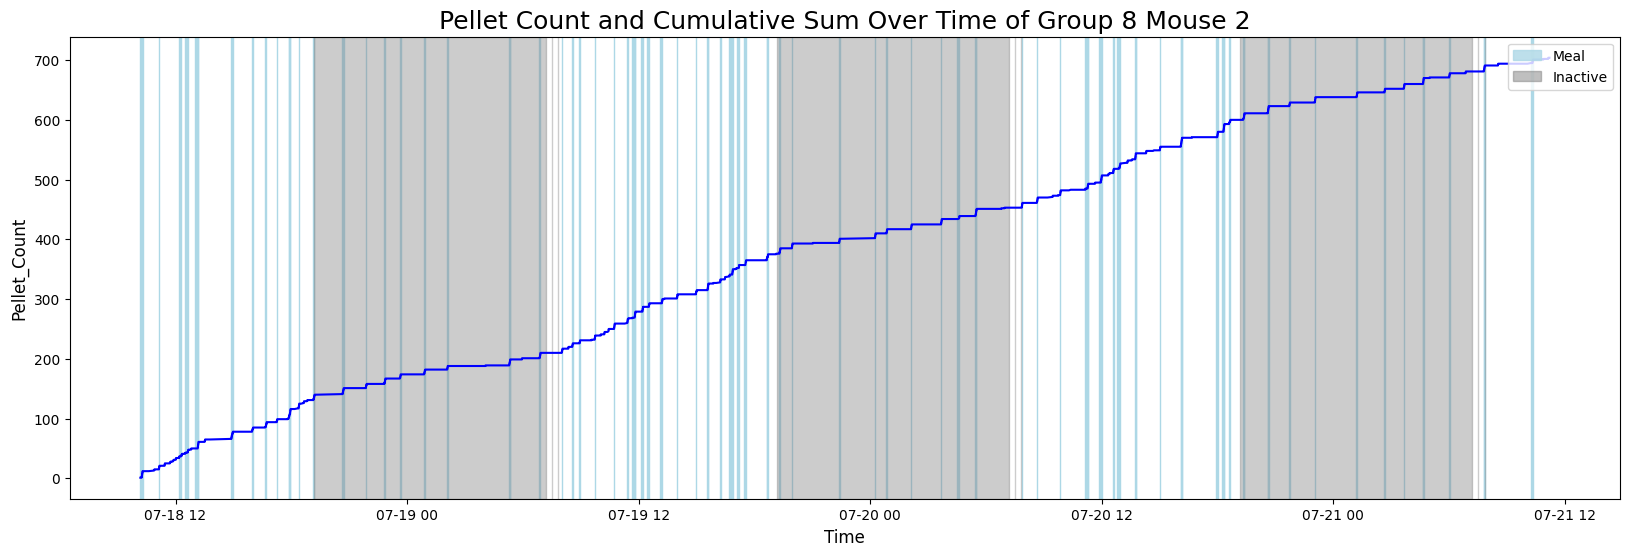

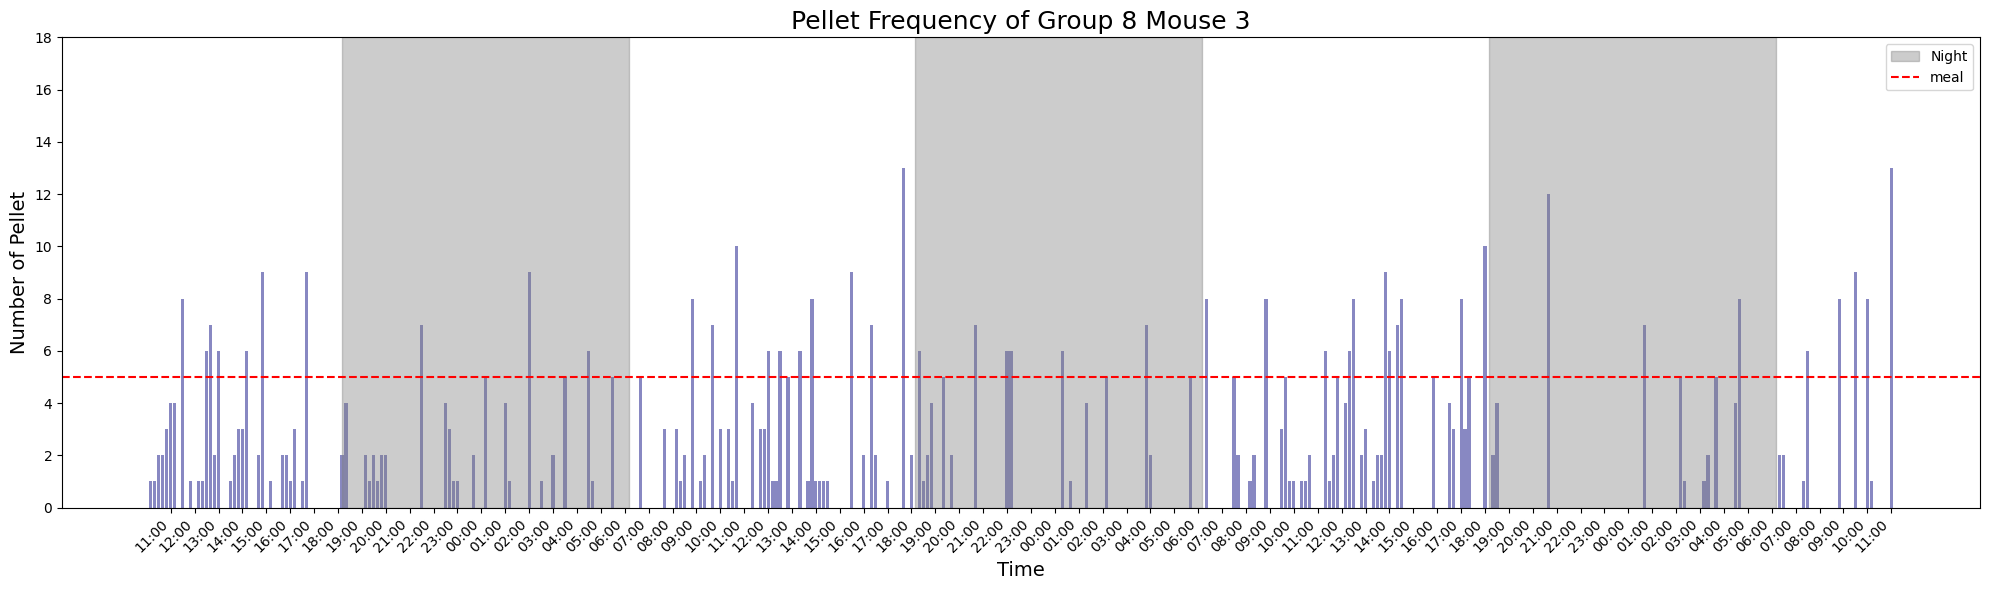

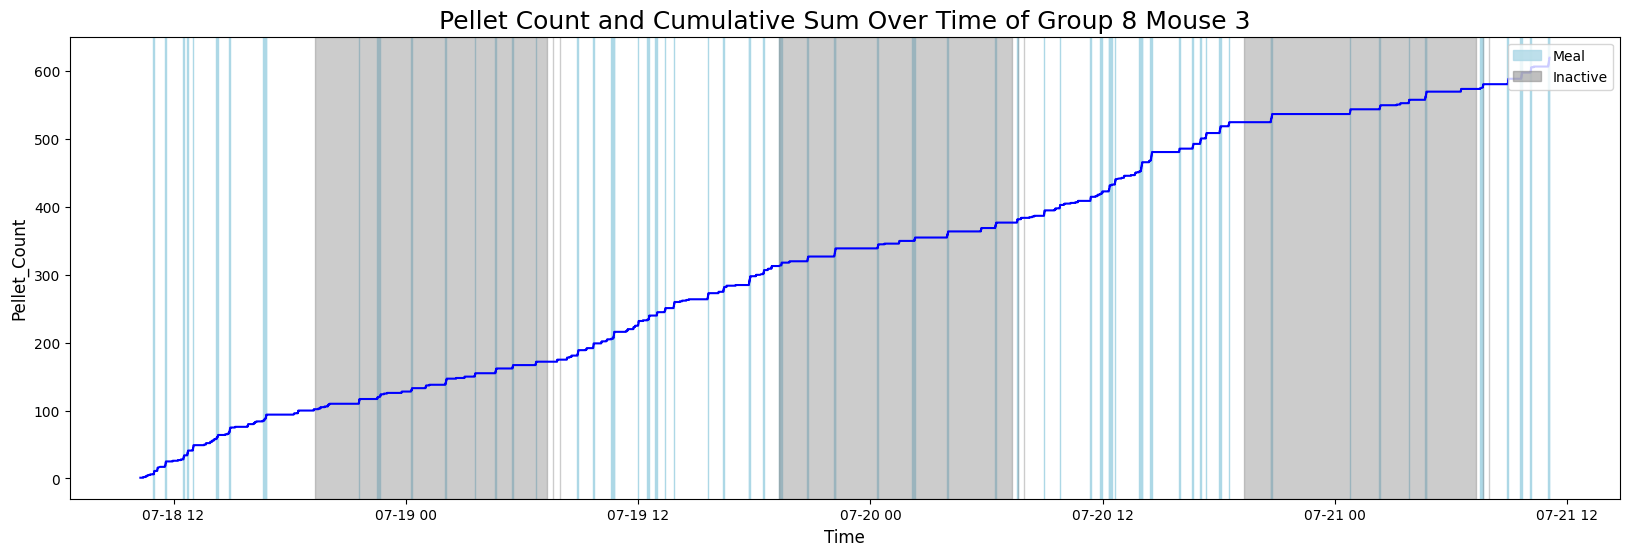

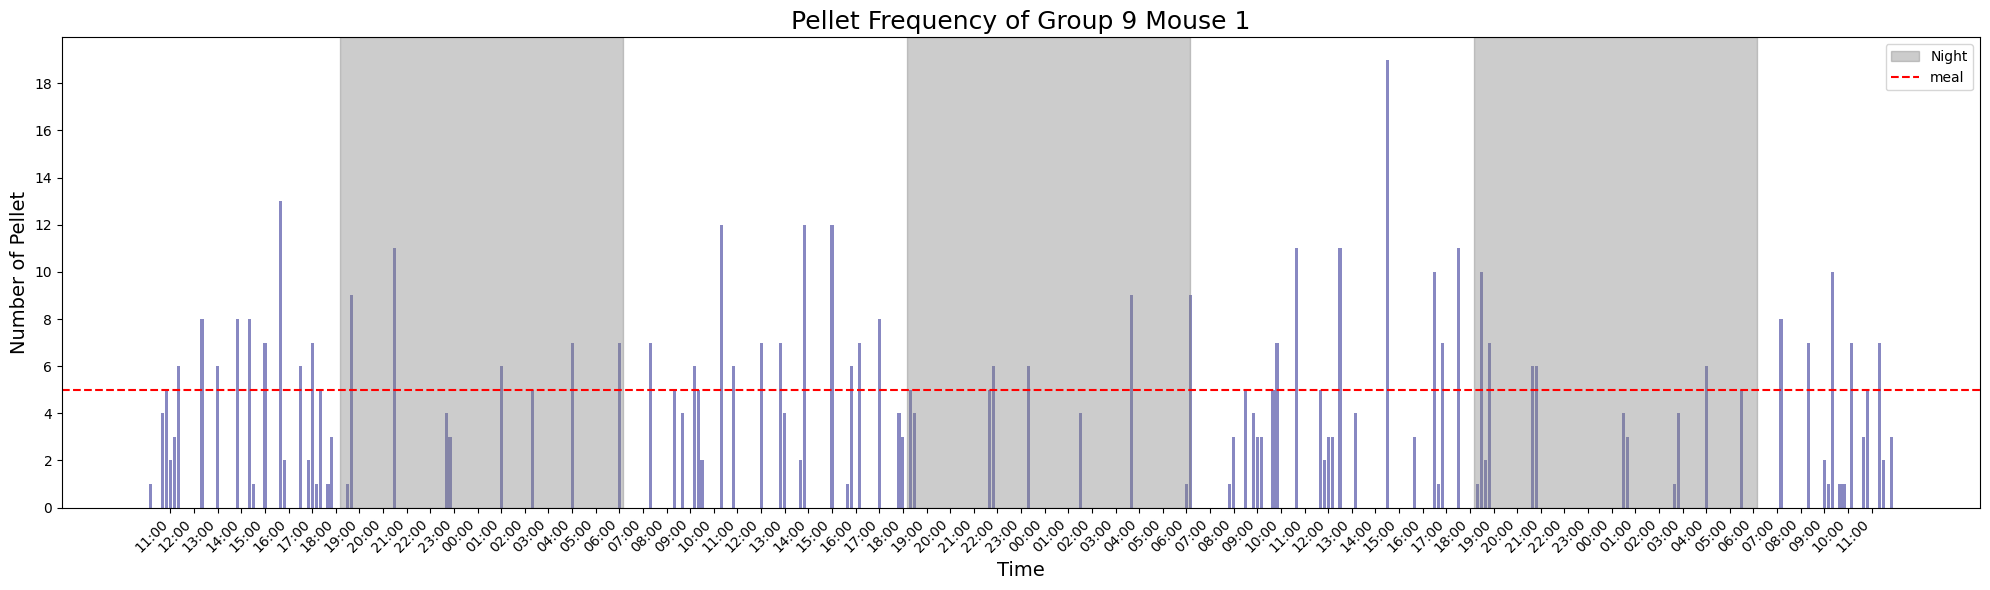

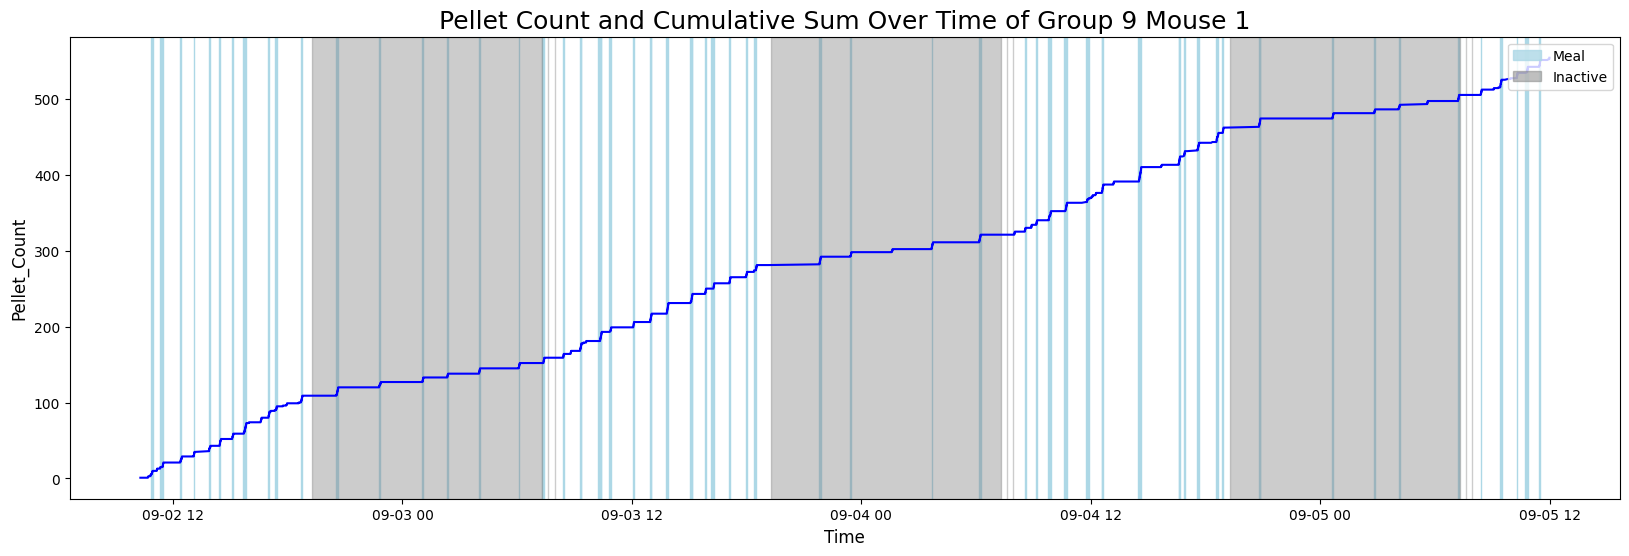

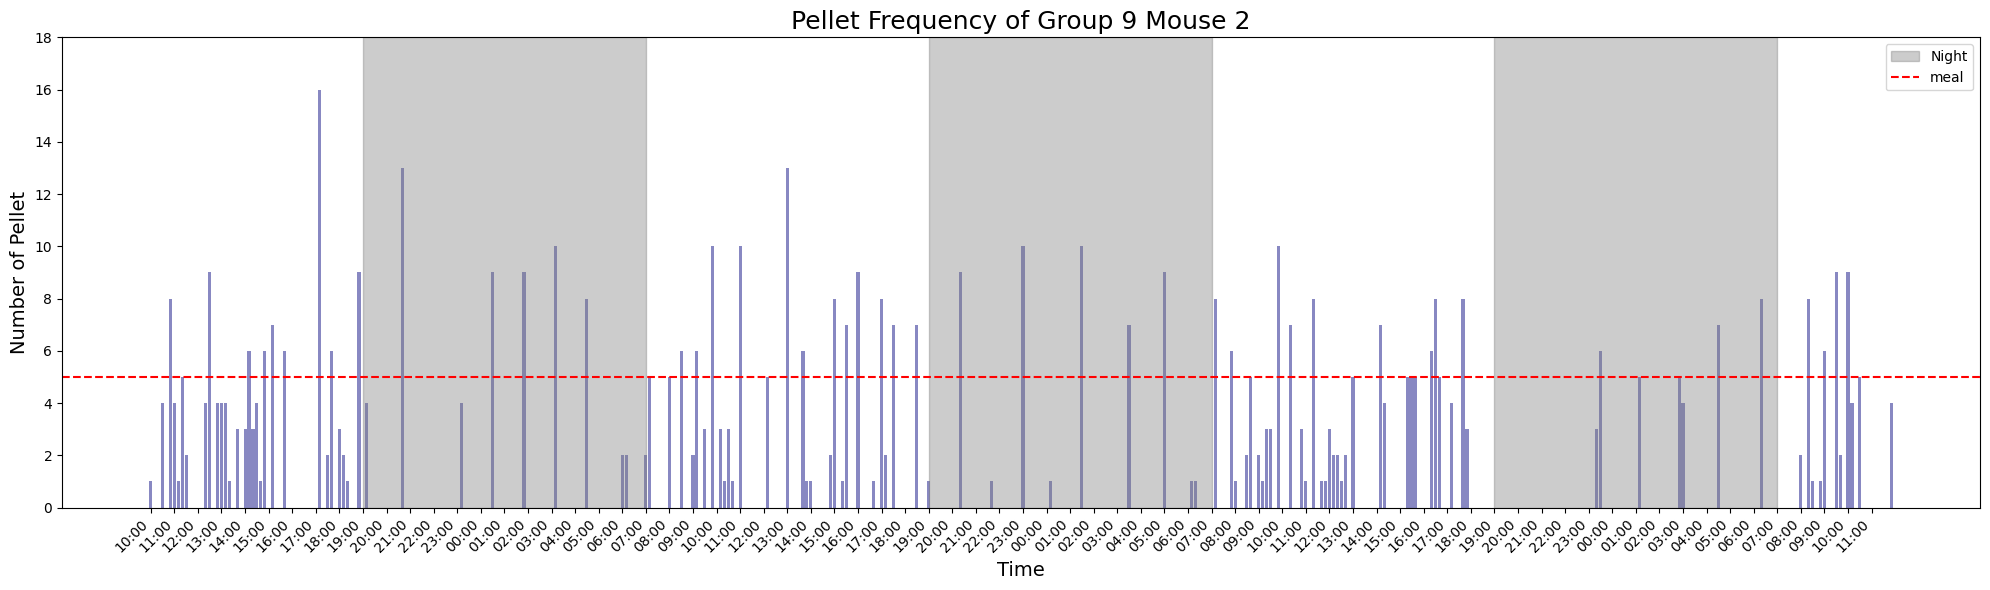

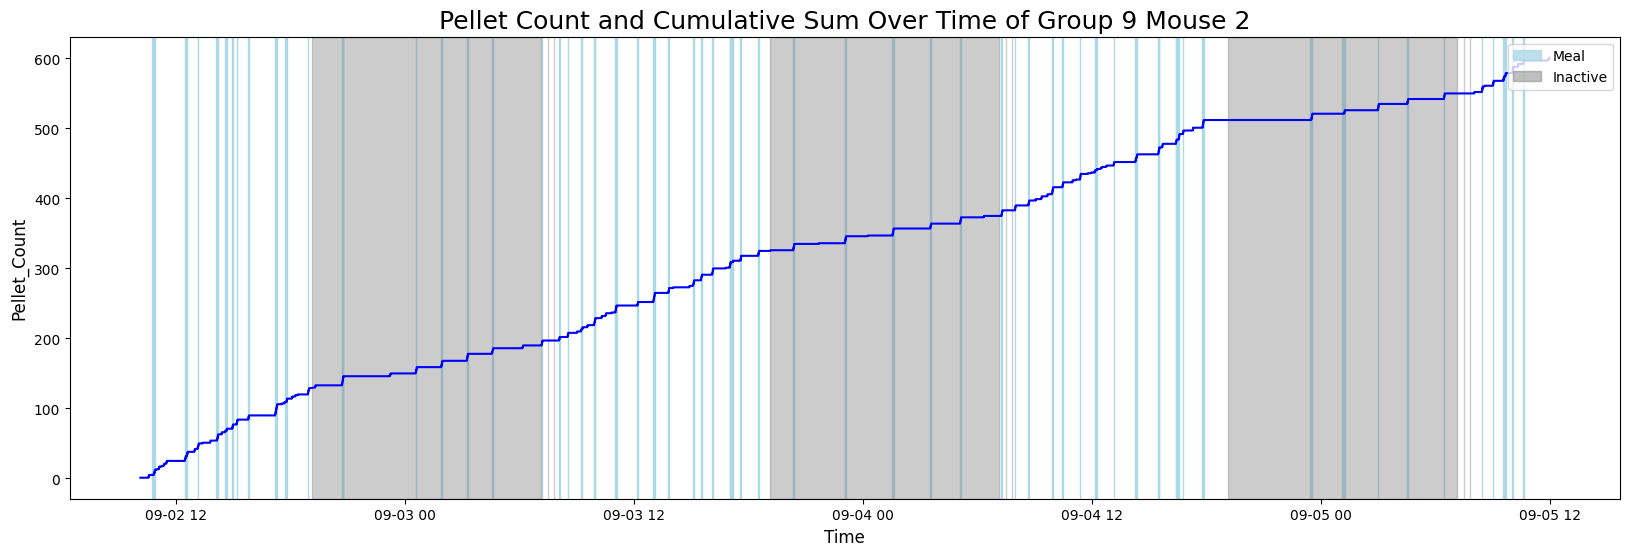

In [27]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
for path in paths.contigency_flip_cask:
    data = read_csv_clean(path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    meal = ml.find_meals(data)
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

### Meal Analysis

In [29]:
print(ctrl_dark_meals)
print(cask_dark_meals)

[0.2698, 0.3235, 0.2535, 0.2817, 0.3455, 0.3506]
[0.1739, 0.236, 0.25, 0.25, 0.25, 0.3151, 0.2692, 0.2222, 0.3491, 0.2143, 0.3548, 0.3194, 0.2368, 0.2533]


In [30]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

In [31]:
invs.MannWhitneyUTest(ctrl_light_meals, ctrl_dark_meals)

P Value is  0.0021645021645021645
There is a significant difference between the two groups.


In [32]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  7.297860003372647e-06
There is a significant difference between the two groups.


In [33]:
# ctrl_dark_meals.remove(max(ctrl_dark_meals))
# cask_dark_meals.remove(max(cask_dark_meals))

In [49]:
invs.MannWhitneyUTest(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.026118916372876905
Experiment group is significantly less than control group


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Pellet Interval Analysis

Control Size: 6
CASK Size: 14
Control Average: 7.986833333333333
CASK Average: 9.299285714285714
Control Standard Deviation: 0.6854418769426527
CASK Standard Deviation: 1.3477232327477007


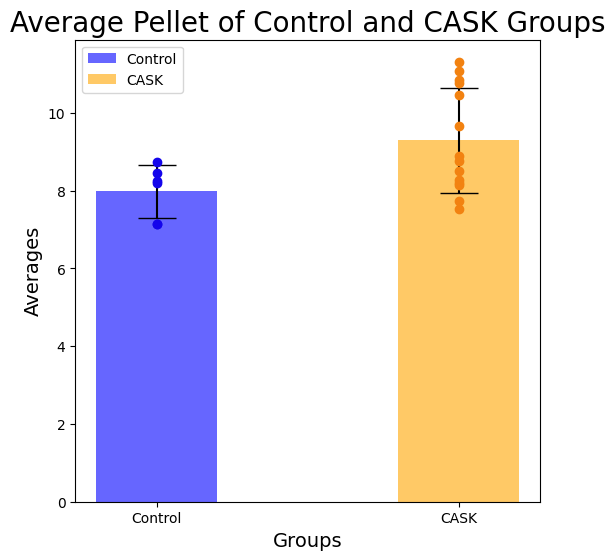

In [45]:
ml.graph_average_pellet(ctrl_avg_pellet, cask_avg_pellet, exp_name='CASK')

In [50]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='greater')

P Value is  0.01898857483032484
Experiment group is significantly greater than control group


* Average Interval also matches the FR1 case that experimental group has larger variance in average intervals.
* no significance difference between all average intervals